# Importing Libraries

In [1]:
import pandas as pd
import warnings #ignore warnings
warnings.filterwarnings('ignore')

# Importing the Dataset

In [2]:
pd.set_option('display.max_columns', None) # Display all the columnsin the DataFrame

file_path = 'KPMG_VI_New_raw_data_update_final.xlsx' # Declaring the path to the Excel file

needed_sheets = ['CustomerDemographic', 'CustomerAddress', 'Transactions'] # Storing the sheets in to a variable

imported_dfs = pd.read_excel(file_path, needed_sheets) # Reading the file path and sheets with pandas and saving in 'imported_dfs' variable

# Saving each sheet now in pandas dataframe into individual dataframe for easier exploration 

customer_demographic_df = imported_dfs['CustomerDemographic']
customer_address_df = imported_dfs['CustomerAddress']
transaction_df = imported_dfs['Transactions']

In [3]:
# Merge customer_demographics_df and customer_address_df
merged_df = pd.merge(customer_address_df, customer_demographic_df, on='customer_id', how='right')

# Perform the LEFT JOIN with transaction_df
df = pd.merge(merged_df, transaction_df, on='customer_id', how='left')

# Show DataFrame
df

customer_id                    address  postcode            state  \
0                1         060 Morning Avenue    2016.0  New South Wales   
1                1         060 Morning Avenue    2016.0  New South Wales   
2                1         060 Morning Avenue    2016.0  New South Wales   
3                1         060 Morning Avenue    2016.0  New South Wales   
4                1         060 Morning Avenue    2016.0  New South Wales   
...            ...                        ...       ...              ...   
20499         3996         0 Transport Center    3977.0              VIC   
20500         3997        4 Dovetail Crossing    2350.0              NSW   
20501         3998       736 Roxbury Junction    2540.0              NSW   
20502         3999            1482 Hauk Trail    3064.0              VIC   
20503         4000  57042 Village Green Point    4511.0              QLD   

         country  property_valuation first_name  last_name  gender  \
0      Australia                10.0    Laraine  Medendorp       F   
1      Australia                10.0    Laraine  Medendorp       F   
2      Australia                10.0    Laraine  Medendorp       F   
3      Australia                10.0    Laraine  Medendorp       F   
4      Australia                10.0    Laraine  Medendorp       F   
...          ...                 ...        ...        ...     ...   
20499  Australia                 6.0    Rosalia   Halgarth  Female   
20500  Australia                 2.0     Blanch     Nisuis  Female   
20501  Australia                 6.0     Sarene    Woolley       U   
20502  Australia                 3.0  Patrizius        NaN    Male   
20503  Australia                 6.0      Kippy    Oldland    Male   

       past_3_years_bike_related_purchases        DOB              job_title  \
0                                       93 1953-10-12    Executive Secretary   
1                                       93 1953-10-12    Executive Secretary   
2                                       93 1953-10-12    Executive Secretary   
3                                       93 1953-10-12    Executive Secretary   
4                                       93 1953-10-12    Executive Secretary   
...                                    ...        ...                    ...   
20499                                    8 1975-08-09  VP Product Management   
20500                                   87 2001-07-13        Statistician II   
20501                                   60        NaT      Assistant Manager   
20502                                   11 1973-10-24                    NaN   
20503                                   76 1991-11-05   Software Engineer IV   

      job_industry_category     wealth_segment deceased_indicator  \
0                    Health      Mass Customer                  N   
1                    Health      Mass Customer                  N   
2                    Health      Mass Customer                  N   
3                    Health      Mass Customer                  N   
4                    Health      Mass Customer                  N   
...                     ...                ...                ...   
20499                Health      Mass Customer                  N   
20500         Manufacturing     High Net Worth                  N   
20501                    IT     High Net Worth                  N   
20502         Manufacturing  Affluent Customer                  N   
20503                   NaN  Affluent Customer                  N   

                      default owns_car  tenure  transaction_id  product_id  \
0                          "'      Yes    11.0            94.0        86.0   
1                          "'      Yes    11.0          3765.0        38.0   
2                          "'      Yes    11.0          5157.0        47.0   
3                          "'      Yes    11.0          9785.0        72.0   
4                          "'      Yes    11.0         13424.0         2.

In [4]:
print(f'DataFrame has {df.shape[0]} rows and {df.shape[1]} columns')

DataFrame has 20504 rows and 30 columns


In [5]:
# import Numpy for data manipulations
import numpy as np

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#### Let's check view more informatons on the dataset by looking at all the columns name, the data types, and count of null values

In [6]:
# Show DataFrame Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20504 entries, 0 to 20503
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          20504 non-null  int64         
 1   address                              20475 non-null  object        
 2   postcode                             20475 non-null  float64       
 3   state                                20475 non-null  object        
 4   country                              20475 non-null  object        
 5   property_valuation                   20475 non-null  float64       
 6   first_name                           20504 non-null  object        
 7   last_name                            19849 non-null  object        
 8   gender                               20504 non-null  object        
 9   past_3_years_bike_related_purchases  20504 non-null  int64         
 10  DOB       

# Data Cleaning and Exploration

#### We have some columns where the cells are empty. We are going to fix this by exploring individuals columns

## Address

In [7]:
# Drop rows where address is empty

df.dropna(subset=['address'], inplace=True)

df.shape

(20475, 30)

Now the number of rows in the dataframe has dropped from 20504 to 20475 showing we have successfully dropped rows where address is empty

## Postcode

#### The postcode column is stored in Float datatype. We are going to convert it into Integer.

In [8]:
# Convert the postcode from Object data type to Interger (whole number)

df['postcode'] = df['postcode'].astype(int)

df['postcode'].dtypes

dtype('int32')

## State

In [9]:
# Show the count of values in the state column

df['state'].value_counts()

NSW                10472
VIC                 4682
QLD                 4356
New South Wales      485
Victoria             480
Name: state, dtype: int64

There are disparities in the state column. Fixing it by renaming the abbreviated names in full name.

#### Fixing the name disparities in State column

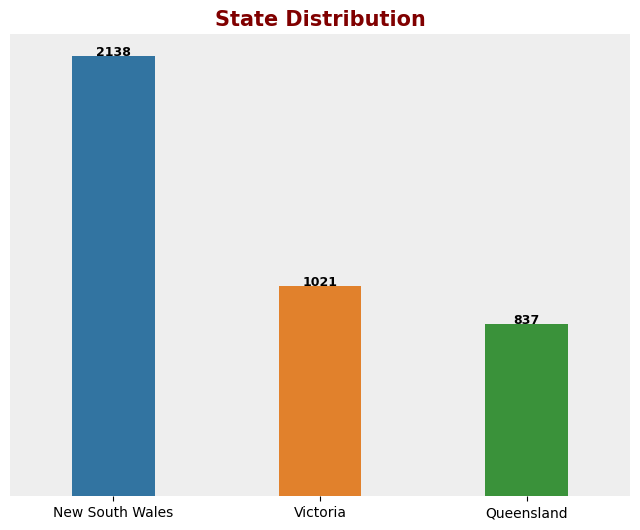

Sprocket Central LTD. have a total 3996 customers in the three states. The number of customers in New South Wales is 2138, the number of customers in Victoria is 1021, and the count of customers in Queensland is 837.


In [10]:
# Replace the abbreviated name into fullname
df['state'].replace({'NSW': 'New South Wales', 'QLD': 'Queensland', 'VIC': 'Victoria'}, inplace=True)

# To show customer count in each state, we drop the transaction count duplicates to get the unique number of customers
unique_customers_df = df.drop_duplicates(subset='customer_id')

# Reset the index
df.reset_index(drop=True, inplace=True)

state_count = unique_customers_df['state'].value_counts()

# Create the seaborn bar plot
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x=state_count.index, y=state_count.values, width=.4)
sns.despine(left=True, bottom=True)

# Annotate the bars with their heights
for i, value in enumerate(state_count.values):
    plt.text(i, value + 0.3, str(value), ha='center', fontsize=9, color='black', weight='bold')

ax.set_facecolor('#eeeeee')
ax.grid(False)
ax.set_yticks([])

# Set labels and title
plt.xlabel(None)
plt.ylabel(None)
plt.title('State Distribution', fontsize=15, color='maroon', fontweight='bold')

# Show the plot
plt.show()
print(f'Sprocket Central LTD. have a total {state_count.sum()} customers in the three states. The number of customers in {state_count.index[0]} is {state_count.values[0]}, the number of customers in {state_count.index[1]} is {state_count.values[1]}, and the count of customers in {state_count.index[2]} is {state_count.values[2]}.')

## Country

In [11]:
# Display unique values in country column

df['country'].unique()

array(['Australia'], dtype=object)

There is nothing to fix in the country column

## Property Valuation

#### Convert the Property valuation data type to Interger from Float, then segment the number of property owns by customers into diiferent groups.

In [12]:
# Convert the data type to integer
df['property_valuation'] = df['property_valuation'].astype(int)

# Print Property valuation datatype
print(df['property_valuation'].dtypes)
print()
# Print Property Valuation unique values
print(df['property_valuation'].unique())

int32

[10  9  4 12  8  6  7  3  5 11  1  2]


 #### The maximum number of property own by customers is 10 while the minimum is 1. We are going to segmented the property into High Valuation (8-10 properties), Moderate Valuation(5-7 properties), and Low Valuation(1-4 properties) 

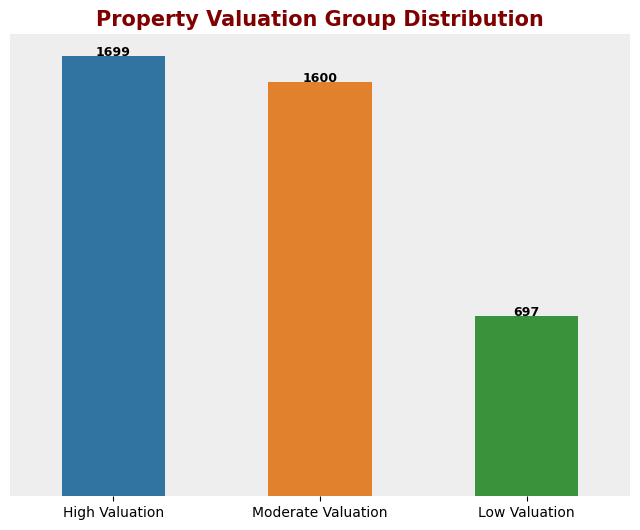

The number of High Valuation customers is 1699, Moderate Valuation customers is 1600, and Low Valuation customers is 697


In [13]:
# Create conditional statements to create a new column for property valuation segmentation.

def update_property(row):
    if row['property_valuation'] <= 4:
        return 'Low Valuation'
    elif row['property_valuation'] <= 8:
        return 'Moderate Valuation'
    else:
        return 'High Valuation'

df['property_valuation_group'] = df.apply(update_property, axis=1)

# To show customer count for each property valuation group, we drop the transaction count duplicates to get the unique number of customers
unique_customers_df = df.drop_duplicates(subset='customer_id')

# Reset the index
df.reset_index(drop=True, inplace=True)

valuation_count = unique_customers_df['property_valuation_group'].value_counts()

# Create the seaborn bar plot
fig, ax = plt.subplots(figsize = (8, 6))
sns.barplot(x=valuation_count.index, y=valuation_count.values, width=0.5)
sns.despine(left=True, bottom=True)

# Annotate the bars with their heights
for i, value in enumerate(valuation_count.values):
    plt.text(i, value + 0.3, str(value), ha='center', fontsize=9, color='black', weight='bold')

ax.set_facecolor('#eeeeee')
ax.grid(False)
ax.set_yticks([])

# Set labels and title
plt.xlabel(None)
plt.ylabel(None)
plt.title('Property Valuation Group Distribution', fontsize=15, color='maroon', fontweight='bold')

# Show the plot
plt.show()
print(f'The number of {valuation_count.index[0]} customers is {valuation_count.values[0]}, {valuation_count.index[1]} customers is {valuation_count.values[1]}, and {valuation_count.index[2]} customers is {valuation_count.values[2]}')

## Gender

In [14]:
# Show the value count of the customers gender

df['gender'].value_counts()

Female    10258
Male       9727
U           466
F            11
Femal         7
M             6
Name: gender, dtype: int64

#### Noticed some disparities in the gender column and we'll fix it my renaming 'F', 'Femal', and 'M' values to represent the actual gender names and drop the 'U' values. Dropping U is essential here because the value is unknown to us and the count is low to have any impact on the dataframe.

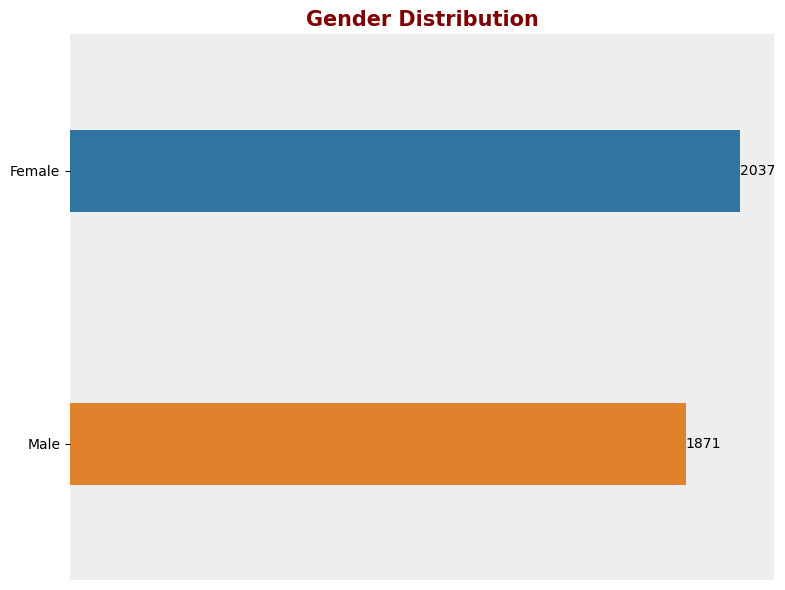

The store has 2037 Female customers and 1871 Male customers in the particular year.


In [15]:
# Rename values in the "gender" column
df['gender'].replace({'F': 'Female', 'Femal': 'Female', 'M': 'Male'}, inplace=True)

# Remove rows with 'U' in the "gender" column
df = df[df['gender'] != 'U']

# To show customer count for each gender, we drop the transaction count duplicates to get the unique number of customers
unique_customers_df = df.drop_duplicates(subset='customer_id')

# Reset the index
df.reset_index(drop=True, inplace=True)

gender_count = unique_customers_df['gender'].value_counts()

# Create the seaborn bar plot
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(y=gender_count.index, x=gender_count.values, width=0.3)
sns.despine(left=True, bottom=True)

# Annotate the bars with their values
ax.set_facecolor('#eeeeee')
ax.bar_label(ax.containers[0])
ax.grid(False)
ax.set_xticks([])

# Set labels and title

plt.xlabel('', fontsize=14, color='maroon', fontweight='bold')
plt.ylabel('', fontsize=14, color='maroon', fontweight='bold')
plt.title('Gender Distribution', fontsize=15, color='maroon', fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()
print(f'The store has {gender_count.values[0]} {gender_count.index[0]} customers and {gender_count.values[1]} {gender_count.index[1]} customers in the particular year.')

## Past 3 years bike related purchases

In [16]:
df['past_3_years_bike_related_purchases'].describe()

count    20009.000000
mean        48.922885
std         28.678292
min          0.000000
25%         24.000000
50%         48.000000
75%         73.000000
max         99.000000
Name: past_3_years_bike_related_purchases, dtype: float64

#### To get the better understanding of this column, we'll create a new column and divide the past 3 years related purchases into different past 3 years bike related activity group.

* Low Activity will represnt bike related purchases less than 20
* Moderate Activity will represnt bike related purchases less than 40
* Average Activity will represnt bike related purchases less than 60
* High Activity will represnt bike related purchases less than 80
* Very High Activity will represnt bike related purchases from 80 and above

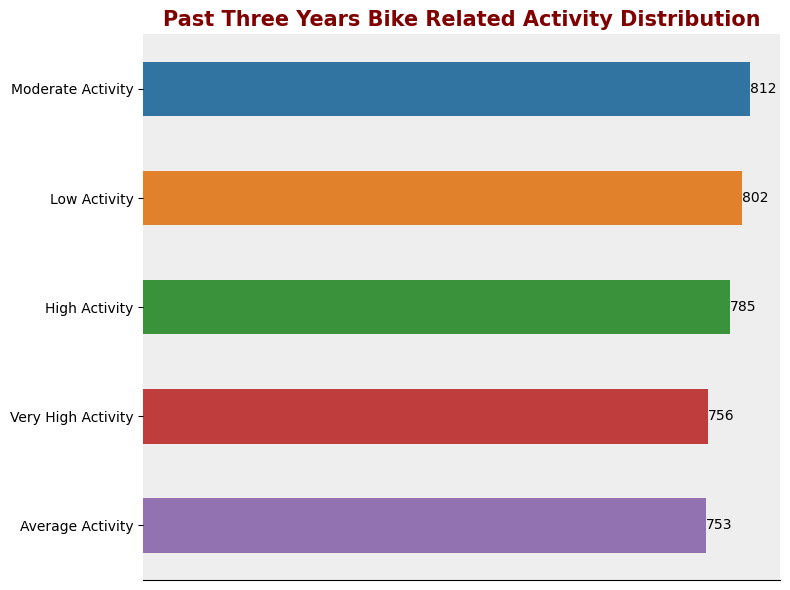

The number of Moderate Activity customers is 812, Low Activity customers is 802, High Activity customers is 785, Very High Activity customers is 756, and Average Activity customers is 753


In [17]:
def update_past_3_years_activity(row):
    if 0 <= row['past_3_years_bike_related_purchases'] <= 19:
        return 'Low Activity'
    elif 20 <= row['past_3_years_bike_related_purchases'] <= 39:
        return 'Moderate Activity'
    elif 40 <= row['past_3_years_bike_related_purchases'] <= 59:
        return 'Average Activity'
    elif 60 <= row['past_3_years_bike_related_purchases'] <= 79:
        return 'High Activity'
    else:
        return 'Very High Activity'

df['past_3_years_bike_related_activity'] = df.apply(update_past_3_years_activity, axis=1)

# Dropping the transaction count duplicates to get the unique number of customers
unique_customers_df = df.drop_duplicates(subset='customer_id')

# Reset the index
df.reset_index(drop=True, inplace=True)

# Calculate customer count for the column
activity_count = unique_customers_df['past_3_years_bike_related_activity'].value_counts()

# Create the seaborn bar plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=activity_count.values, y=activity_count.index, ax=ax, width=0.5)
sns.despine(left=True)

# Annotate the bars with their value counts
ax.set_facecolor('#eeeeee')
ax.bar_label(ax.containers[0])
ax.grid(False)
ax.set_xticks([])

# Set labels and title
plt.xlabel('', fontsize=14, color='maroon', fontweight='bold')
plt.ylabel('', fontsize=14, color='maroon', fontweight='bold')
plt.title('Past Three Years Bike Related Activity Distribution', fontsize=15, color='maroon', fontweight='bold')
plt.xticks(rotation=43, fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()
print(f'The number of {activity_count.index[0]} customers is {activity_count.values[0]}, {activity_count.index[1]} customers is {activity_count.values[1]}, {activity_count.index[2]} customers is {activity_count.values[2]}, {activity_count.index[3]} customers is {activity_count.values[3]}, and {activity_count.index[4]} customers is {activity_count.values[4]}')

## DOB

In [18]:
# Get description of the Date of Birth DOB column
print(df['DOB'].describe(datetime_is_numeric=True))

count                            20009
mean     1977-08-16 21:57:30.667199776
min                1931-10-23 00:00:00
25%                1968-04-11 00:00:00
50%                1977-08-28 00:00:00
75%                1987-03-24 00:00:00
max                2002-03-11 00:00:00
Name: DOB, dtype: object


With the DOB column, we can extract two new columns 'Age' to show the customers actual age and 'Age Group' to show the which group those customers belong to based on their age.

0        70
1        70
2        70
3        70
4        70
         ..
20004    48
20005    48
20006    22
20007    50
20008    32
Name: age, Length: 20009, dtype: int32


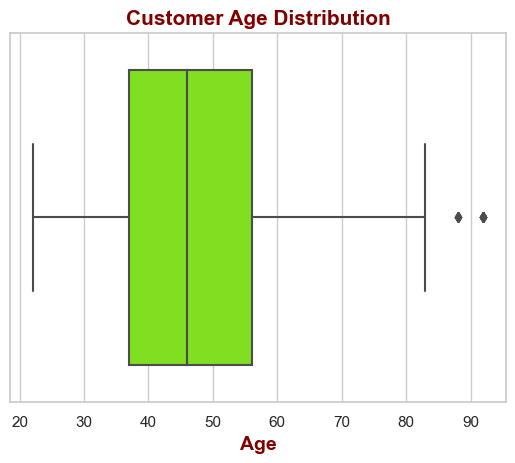

In [19]:
#Create a new column 'age' to claculate the age of each customers and another column 'age_group' to divide age to different group

from datetime import datetime

df['DOB'] = pd.to_datetime(df['DOB'], format='%Y-%m-%d')

today = datetime.now()
df['age'] = (today - df['DOB']).astype('<m8[Y]')
df['age'] = df['age'].astype(int)

# To show customer age count, we drop the transaction count duplicates to get the unique number of customers
unique_customers_df = df.drop_duplicates(subset='customer_id')

# Reset the index
df.reset_index(drop=True, inplace=True)

age_count = unique_customers_df['age'].value_counts()

# Create the seaborn bar plot
sns.set(style="whitegrid")
sns.boxplot(x=df['age'], color='Chartreuse') 

# Set labels and title
plt.xlabel('Age', fontsize=14, color='maroon', fontweight='bold')
plt.title('Customer Age Distribution', fontsize=15, color='maroon', fontweight='bold')
print(df.age)

We have outliers in our age column and we'll try to remove them below.

In [20]:
# Detecting the upper and lower age bound

q1,q3 = np.percentile(df['age'],[25,75]) # Setting the Lower quartile(25) q1 and upper quartile(75) q3

IQR = q3-q1 # Calculating the Interquartile range by subtracting q1 from q3

upper = q3+1.5*IQR # Calculating the upper quartile for customer age
lower = q1-1.5*IQR # Calculating the lower quartile for customer age

print("Upper age bound:",upper,"Lower age bound :", lower)

Upper age bound: 84.5 Lower age bound : 8.5


count    20009.000000
mean        46.271878
std         12.583144
min         22.000000
25%         37.000000
50%         46.000000
75%         56.000000
max         80.000000
Name: age, dtype: float64


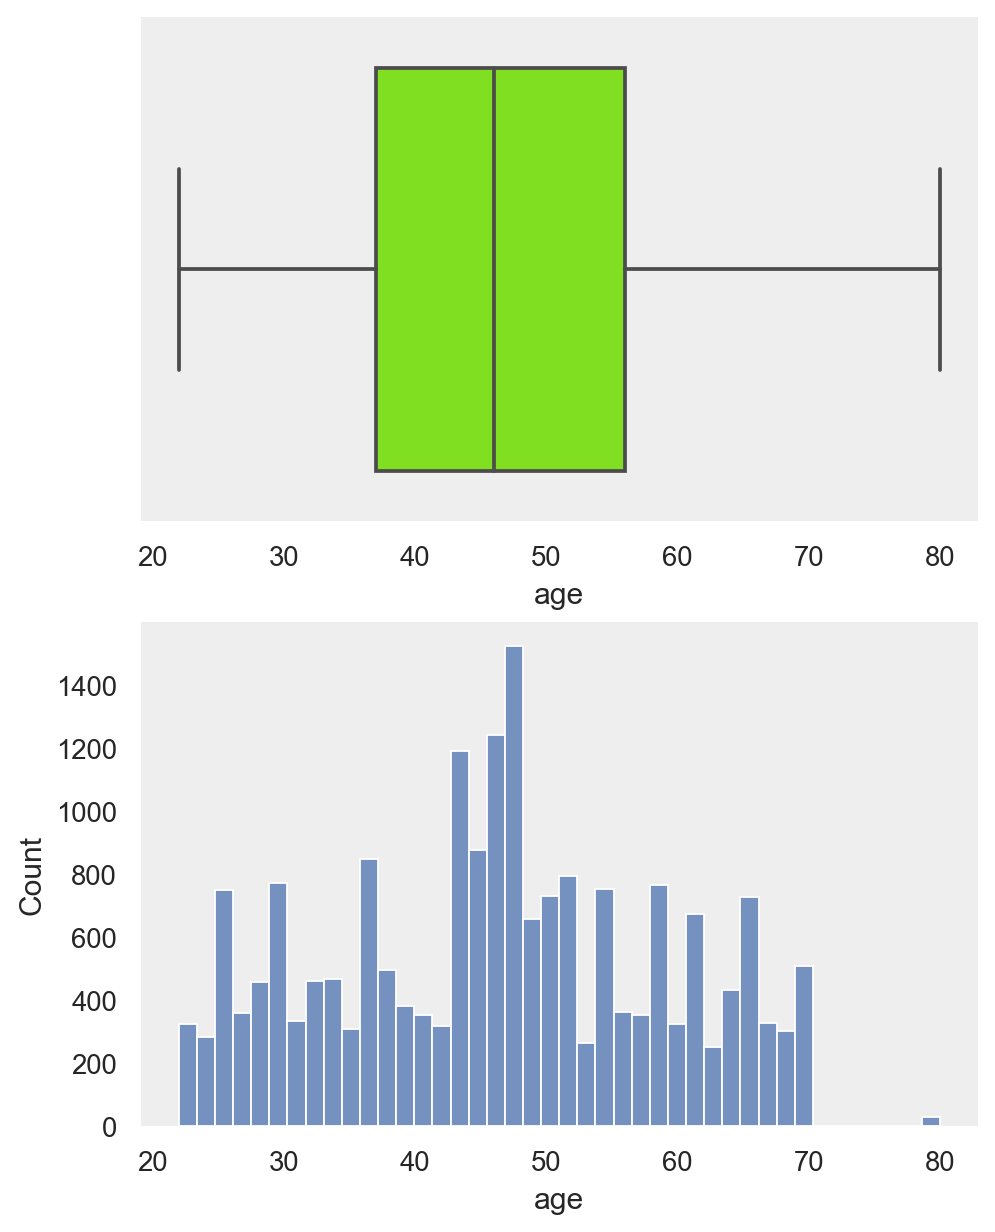

In [21]:
# Clipping out all values outside the upper and lower quartiles threshold above to remove the outliers
ax, fig = plt.subplots(figsize = (6, 8),dpi=180)


# Set Customers age bound between 17 and 80 years
df.age = df.age.clip(17, 80)

# Age outliers fixed Box plot
ax = plt.subplot(2, 1, 1)
ax.grid(False)
ax.set_facecolor('#eeeeee')

sns.set(style="whitegrid")
sns.boxplot(x=df['age'], color='Chartreuse')
sns.despine(left=True, bottom=True)


# Age distribution plot
ax = plt.subplot(2, 1, 2)
ax.set_facecolor('#eeeeee')
ax.grid(False)

sns.histplot(df.age)
sns.despine(left=True, bottom=True)
print(df.age.describe())

#### To get better understanding of customers age distribution, classifying customers into three different age groups e.g Under 30, Middle-aged, and Senior Citizen will be make this more easier as shown below

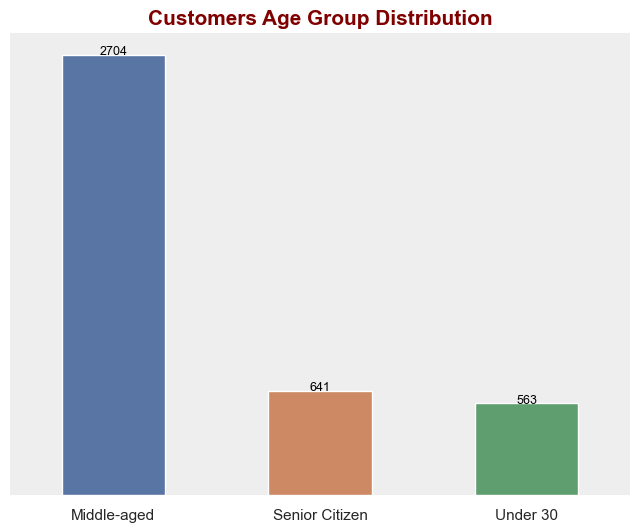

The number of Middle-aged customers is 2704, Senior Citizen customers is 641, and Under 30 customers is 563


In [22]:
#create different age groups
def age_groups(age):
    if age <= 30:
        return 'Under 30'
    elif age <= 60:
        return 'Middle-aged'
    else:
        return 'Senior Citizen'

# Create a new column for customers age groups
df['age_group'] = df['age'].apply(age_groups)
    
# To show customer count for each age group, we drop the transaction count duplicates to get the unique number of customers
unique_customers_df = df.drop_duplicates(subset='customer_id')
age_count = unique_customers_df['age_group'].value_counts()

# Create the seaborn bar plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=age_count.index, y=age_count.values, width=0.5)
sns.despine(left=True, bottom=True)

# Annotate the bars with their heights
for i, value in enumerate(age_count.values):
    plt.text(i, value + 0.3, str(value), ha='center', fontsize=9, color='black')

ax.set_facecolor('#eeeeee')
ax.grid(False)
ax.set_yticks([])

# Set labels and title
plt.xlabel('', fontsize=14, color='maroon', fontweight='bold')
plt.ylabel('', fontsize=14, color='maroon', fontweight='bold')
plt.title('Customers Age Group Distribution', fontsize=15, color='maroon', fontweight='bold')

# Show the plot
plt.show()
print(f'The number of {age_count.index[0]} customers is {age_count.values[0]}, {age_count.index[1]} customers is {age_count.values[1]}, and {age_count.index[2]} customers is {age_count.values[2]}')

## Job Title

In [23]:
print(df['job_title'].value_counts())

print(f'The sum of null values is:', df['job_title'].isnull().sum())

Social Worker                           225
Business Systems Development Analyst    213
Internal Auditor                        208
Legal Assistant                         208
Nuclear Power Engineer                  205
                                       ... 
Systems Administrator IV                 17
Health Coach III                         15
Geologist II                             13
Research Assistant III                   10
Developer I                               7
Name: job_title, Length: 195, dtype: int64
The sum of null values is: 2420


The Job Title column have 2,420 null values. Dropping the cells will likely have effect on the Dataframe so fixing it using the Job Industry Category column.

In [24]:
# Checking the unique values in Job Industry Category

df['job_industry_category'].unique()

array(['Health', 'Financial Services', 'IT', nan, 'Retail', 'Argiculture',
       'Property', 'Manufacturing', 'Telecommunications', 'Entertainment'],
      dtype=object)

Above are all the unique values of job industry category including the NAN. 

Replacing NAN with "Unemployed" where both Job Title and Job Industry Category are NULL on the same row.

Where Job Title is NULL but Job Industry Category IS NOT NULL, replace the NULLs in Job Title with the corresponding Job Industry Category.

In [25]:
# Correct the spelling mistake in 'Argiculture' and the NAN values in Job Industry Category
df['job_industry_category'].replace({'Argiculture': 'Agriculture'}, inplace=True)

# Replacing Job Title's NULL values with the Job Industry Category
def update_job_title(row):
    if pd.isna(row['job_title']):
        if row['job_industry_category'] == 'Agriculture':
            return 'Agriculturist'
        elif row['job_industry_category'] == 'Entertainment':
            return 'Entertainer'
        elif row['job_industry_category'] == 'Financial Services':
            return 'Financial Officer'
        elif row['job_industry_category'] == 'Health':
            return 'Healthcare'
        elif row['job_industry_category'] == 'IT':
            return 'IT Specialist'
        elif row['job_industry_category'] == 'Manufacturing':
            return 'Production Worker'
        elif row['job_industry_category'] == 'Property':
            return 'Property Agent'
        elif row['job_industry_category'] == 'Retail':
            return 'Retailer'
        elif row['job_industry_category'] == 'Telecommunications':
            return 'Telecommunications Worker'
        else:
            return np.nan
    else:
        return row['job_title']
    

df.loc[:, 'job_title'] = df.apply(update_job_title, axis=1)
# Drop NAN
df.dropna(subset=['job_title'], inplace=True)

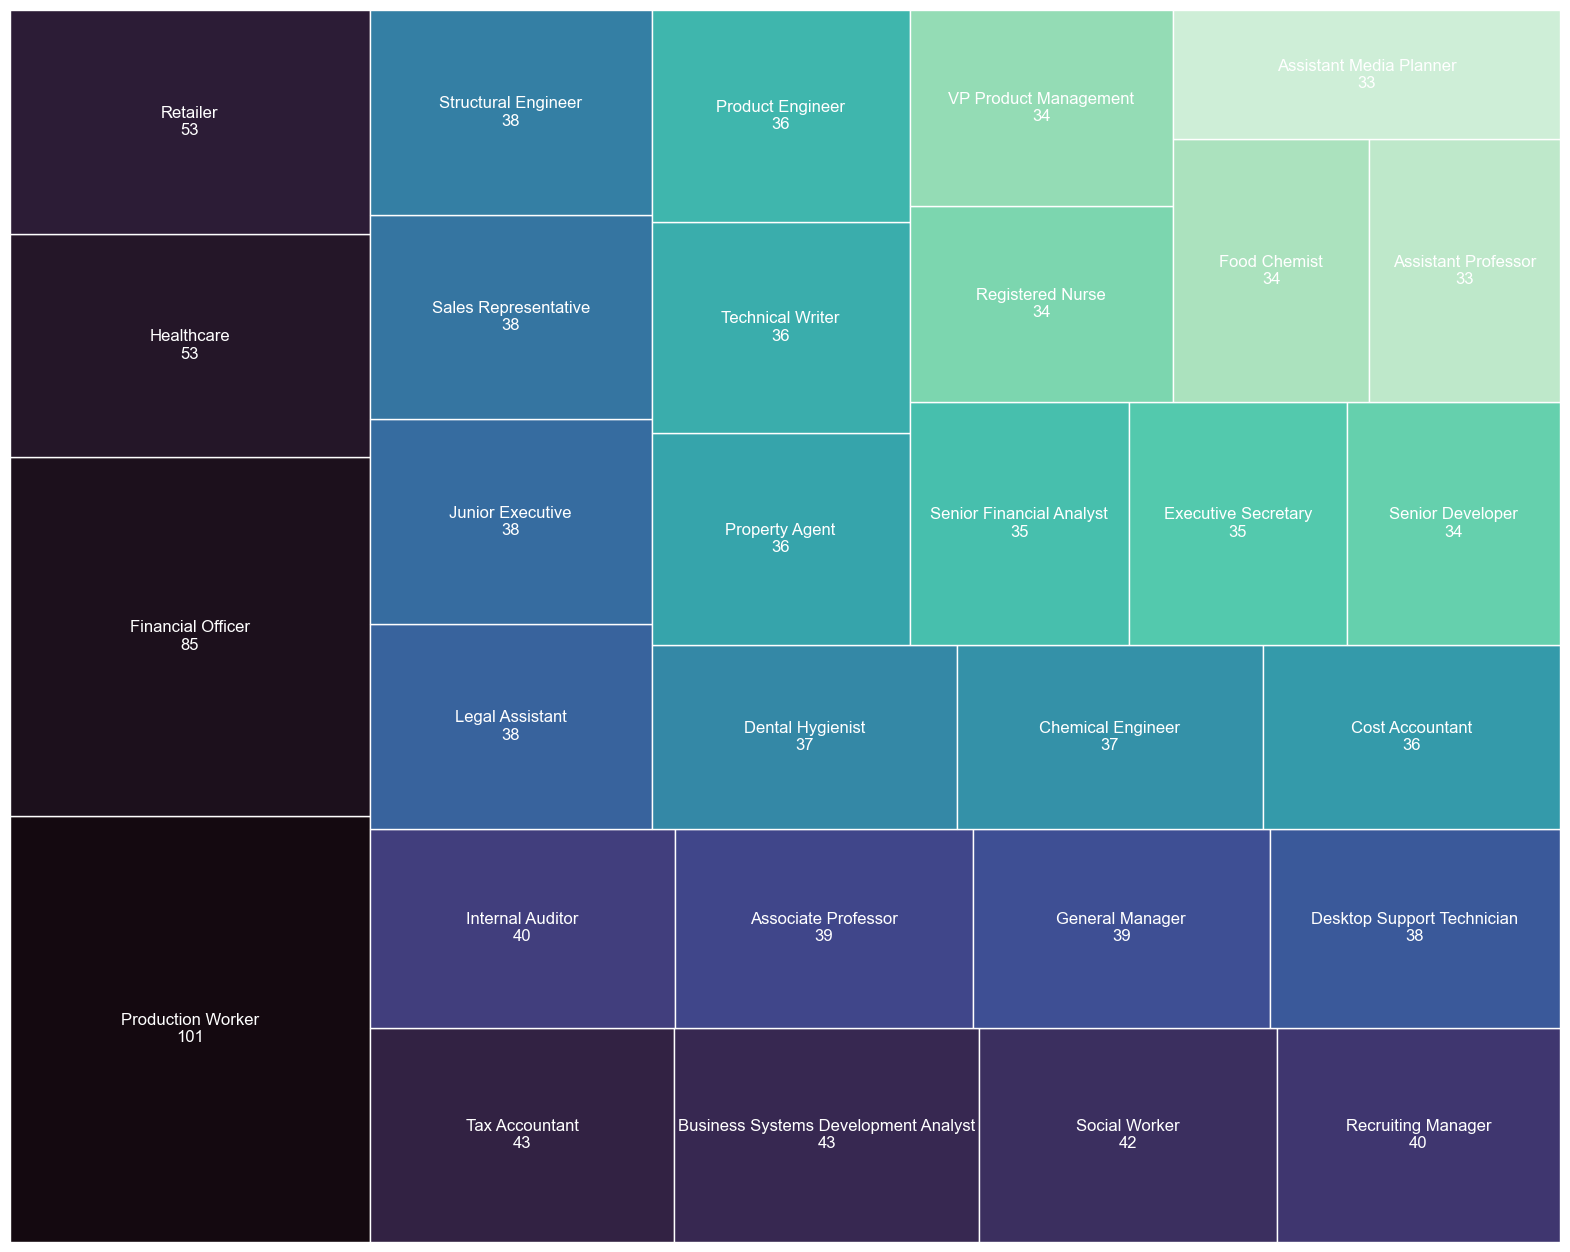

In [26]:
import squarify

# To show customer count for each property valuation group, drop the transaction count duplicates to get the unique number of customers
unique_customers_df = df.drop_duplicates(subset='customer_id')

# Calculate the count of the job titles, show only the top 30
job_title_count = unique_customers_df['job_title'].value_counts().head(30)

# Create labels
labels = [f'{job}\n{count}' for job, count in zip(job_title_count.index, job_title_count)]

# Plot the treemap
plt.figure(figsize=(20, 16))
squarify.plot(sizes=job_title_count, label=labels,
              color = sns.color_palette("mako", len(job_title_count)),
              text_kwargs={'fontsize': 12, 'color': '#ffffff', 'wrap': True, 'verticalalignment': 'center'})

  
# Turn off axis
plt.axis("off")

# Show the plot
plt.show()

## Job Industry Categories

#### When Job Title value is not empty and Job Industry Category is not known or is empty, replace the latter to "Uncategorised".

In [27]:
# Replace Not Applicable cells and NULL cells in the column to Uncategorised
def update_job_category(row):
    if row['job_title'] != '' and pd.isna(row['job_industry_category']): # To handle NAN cells
        return 'Uncategorised'
    elif row['job_title'] != '' and row['job_industry_category'] == 'n/a': # To handle whitespace cells
        return 'Uncategorised'
    else:
        return row['job_industry_category']

# Apply to the DataFrame
df.loc[:, 'job_industry_category'] = df.apply(update_job_category, axis=1)

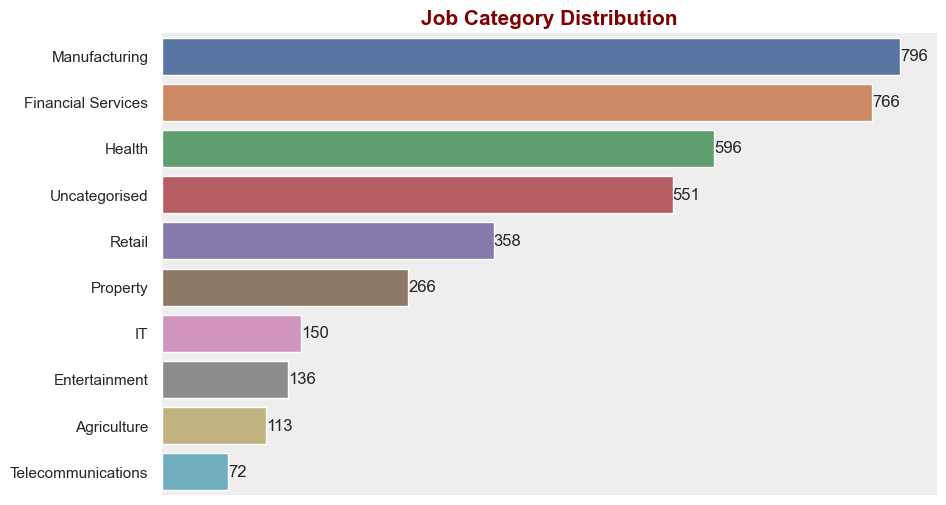

Manufacturing         796
Financial Services    766
Health                596
Uncategorised         551
Retail                358
Property              266
IT                    150
Entertainment         136
Agriculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64


In [28]:
# To show customer count for each job industry category, we drop the transaction count duplicates to get the unique number of customers
unique_customers_df = df.drop_duplicates(subset='customer_id')

# Reset the index
df.reset_index(drop=True, inplace=True)

# Calculate the customer count for job industry category
job_category_count = unique_customers_df['job_industry_category'].value_counts()

# Create the seaborn bar plot
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x=job_category_count.values, y=job_category_count.index, )
sns.despine(left=True, bottom=True)

# Add text label to the plot
ax.set_facecolor('#eeeeee')
ax.bar_label(ax.containers[0])
ax.grid(False)
ax.set_xticks([])
    
# Set labels and title
plt.xlabel('', fontsize=14, color='maroon', fontweight='bold')
plt.ylabel('', fontsize=14, color='maroon', fontweight='bold')
plt.title('Job Category Distribution', fontsize=15, color='maroon', fontweight='bold')

plt.show()
print(unique_customers_df['job_industry_category'].value_counts())

Most of the store's customers are from the Manufacturing job industry, followed the Financial Services job category while the Telecommunications job industry category has the lowest customer counts at the store.

## Wealth Segment

In [29]:
df['wealth_segment'].unique()

array(['Mass Customer', 'Affluent Customer', 'High Net Worth'],
      dtype=object)

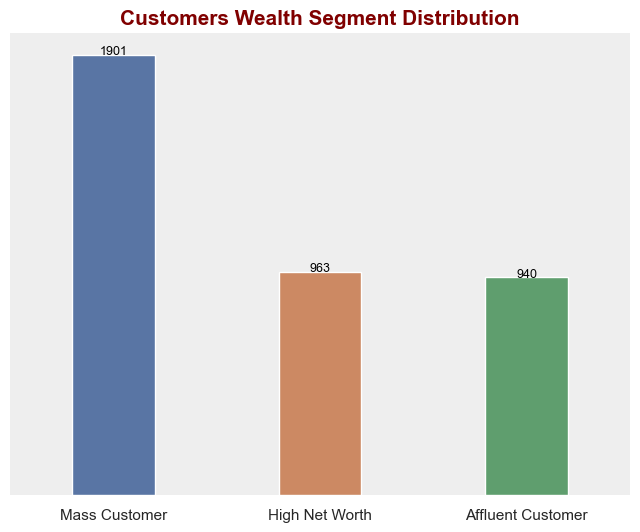

The number of Mass Customer customers is 1901, High Net Worth customers is 963, and Affluent Customer customers is 940


In [30]:
# To show customer count for each wealth segment, we drop the transaction count duplicates to get the unique number of customers
unique_customers_df = df.drop_duplicates(subset='customer_id')

wealth_count = unique_customers_df['wealth_segment'].value_counts()

# Create the seaborn bar plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=wealth_count.index, y=wealth_count.values, width=.4)
sns.despine(left=True, bottom=True)

# Annotate the bars with their heights
for i, value in enumerate(wealth_count.values):
    plt.text(i, value + 0.3, str(value), ha='center', fontsize=9, color='black')

ax.set_facecolor('#eeeeee')
ax.grid(False)
ax.set_yticks([])

# Set labels and title
plt.xlabel(None)
plt.ylabel(None)
plt.title('Customers Wealth Segment Distribution', fontsize=15, color='maroon', fontweight='bold')

plt.show()

print(f'The number of {wealth_count.index[0]} customers is {wealth_count.values[0]}, {wealth_count.index[1]} customers is {wealth_count.values[1]}, and {wealth_count.index[2]} customers is {wealth_count.values[2]}')

## Deceased Indicator

In [31]:
df['deceased_indicator'].unique()

array(['N', 'Y'], dtype=object)

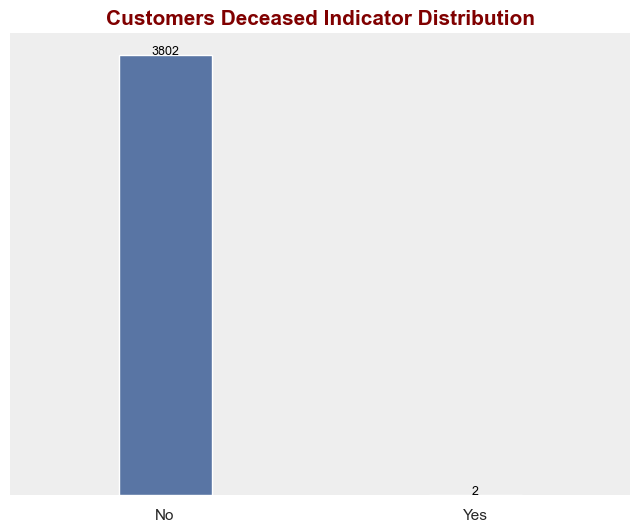

3802 customers has thier deceased indicator as No, and 2 customers has their deceased indicator as Yes. This shows that most of the customers are not dead.


In [32]:
# Replace the 'N' values in Customers Deceased Indicator column to 'No' and 'Y' values to 'Yes'
df['deceased_indicator'].replace({'N': 'No', 'Y': 'Yes'}, inplace=True)


# To show customer count for each deceased indicator, we drop the transaction count duplicates to get the unique number of customers
unique_customers_df = df.drop_duplicates(subset='customer_id')
indicator_count = unique_customers_df['deceased_indicator'].value_counts()

# Create the seaborn bar plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=indicator_count.index, y=indicator_count.values, width=0.3)
sns.despine(left=True, bottom=True)

# Annotate the bars with their heights
for i, value in enumerate(indicator_count.values):
    plt.text(i, value + 0.3, str(value), ha='center', fontsize=9, color='black')

ax.set_facecolor('#eeeeee')
ax.grid(False)
ax.set_yticks([])

# Set labels and title
plt.xlabel(None)
plt.ylabel(None)
plt.title('Customers Deceased Indicator Distribution', fontsize=15, color='maroon', fontweight='bold')

plt.show()

print(f'{indicator_count.values[0]} customers has thier deceased indicator as {indicator_count.index[0]}, and {indicator_count.values[1]} customers has their deceased indicator as {indicator_count.index[1]}. This shows that most of the customers are not dead.')

## Default

We can't make sense of what the Default is about. We'll drop the entire column

In [33]:
df = df.drop(columns=['default'])

## Owns Car

In [34]:
df['owns_car'].unique()

array(['Yes', 'No'], dtype=object)

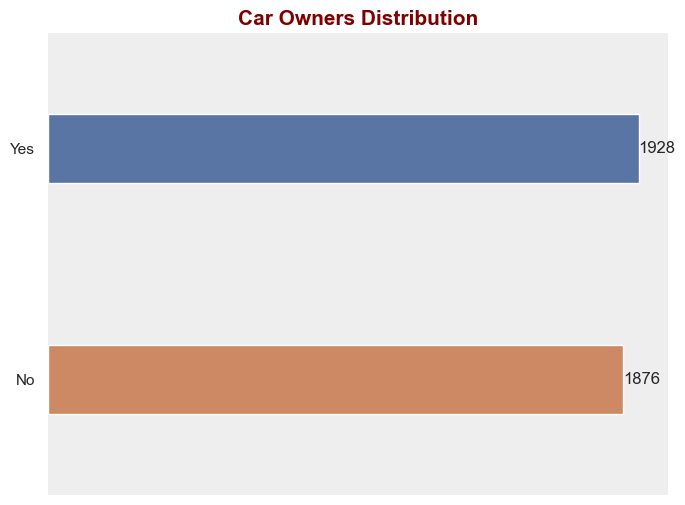

1928 customers owns car (Yes), and 1876 customers do not own car (No)


In [35]:
# Drop the transaction count duplicates to get the unique number of customers
unique_customers_df = df.drop_duplicates(subset='customer_id')

# Get car count
car_count = unique_customers_df['owns_car'].value_counts()

# Create the seaborn bar plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(y=car_count.index, x=car_count.values, width=0.3)
sns.despine(left=True, bottom=True)

# Annotate the plot
ax.set_facecolor('#eeeeee')
ax.bar_label(ax.containers[0])
ax.grid(False)
ax.set_xticks([])

# Set labels and title
plt.xlabel('', fontsize=14, color='maroon', fontweight='bold')
plt.ylabel('', fontsize=14, color='maroon', fontweight='bold')
plt.title('Car Owners Distribution', fontsize=15, color='maroon', fontweight='bold')

plt.show()

print(f'{car_count.values[0]} customers owns car ({car_count.index[0]}), and {car_count.values[1]} customers do not own car ({car_count.index[1]})')

## Tenure

In [36]:
df['tenure'].describe()

count    19506.000000
mean        10.694248
std          5.677682
min          1.000000
25%          6.000000
50%         11.000000
75%         16.000000
max         22.000000
Name: tenure, dtype: float64

We first convert the column from decimal to whole number, then we create a new column to split the tenure into groups

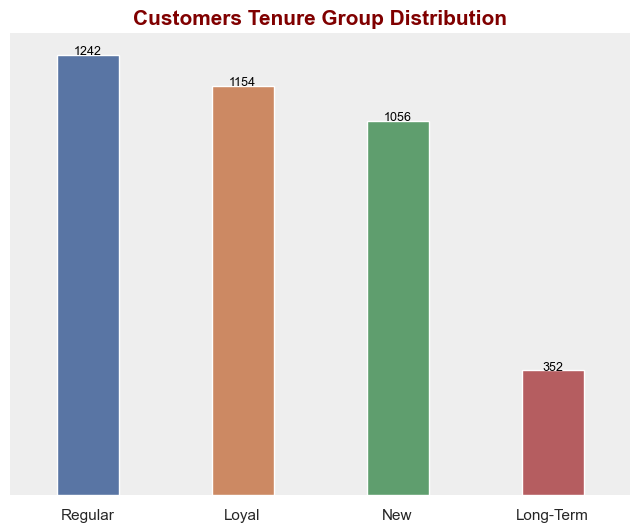

The number of Regular customers is 1242, Loyal customers is 1154, New customers is 1056, and Long-Term customers is 352


In [37]:
# Convert Tenure column from Float to Integer
df['tenure'] = df['tenure'].astype(int)

def update_tenure(row):
    if row['tenure'] <= 6:
        return 'New'
    elif row['tenure'] <= 12:
        return 'Regular'
    elif row['tenure'] <= 18:
        return 'Loyal'
    else:
        return 'Long-Term'
    
# Add the new column to the DataFrame
df['tenure_group'] = df.apply(update_tenure, axis=1)

# Drop the transaction count duplicates to get the unique number of customers
unique_customers_df = df.drop_duplicates(subset='customer_id')

# Cuustomer counts by tenure
tenure_count = unique_customers_df['tenure_group'].value_counts()

# Create the seaborn bar plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=tenure_count.index, y=tenure_count.values, width=0.4)
sns.despine(left=True, bottom=True)

# Annotate the bars with their heights
for i, value in enumerate(tenure_count.values):
    plt.text(i, value + 0.3, str(value), ha='center', fontsize=9, color='black')

ax.set_facecolor('#eeeeee')
ax.grid(False)
ax.set_yticks([])

# Set labels and title
plt.xlabel(None)
plt.ylabel(None)
plt.title('Customers Tenure Group Distribution', fontsize=15, color='maroon', fontweight='bold')

plt.show()

print(f'The number of {tenure_count.index[0]} customers is {tenure_count.values[0]}, {tenure_count.index[1]} customers is {tenure_count.values[1]}, {tenure_count.index[2]} customers is {tenure_count.values[2]}, and {tenure_count.index[3]} customers is {tenure_count.values[3]}')

## Transaction ID

In [38]:
df['transaction_id'].isnull().sum()

479

#### Drop rows where Transaction ID is null and convert to Integer datatype

In [39]:
# Drop all rows where Transaction ID is null
df = df.dropna(subset=['transaction_id'])

df.shape

(19027, 34)

In [40]:
# Convert the Transaction ID column from float to integer
df['transaction_id'] = df['transaction_id'].astype(int)

## Product ID

In [41]:
df['product_id'] = df['product_id'].astype(int)


df['product_id'].isnull().sum()

0

## Transaction Date

In [42]:
df['transaction_date'].dtype

dtype('<M8[ns]')

Create a new column for the transaction month extraction

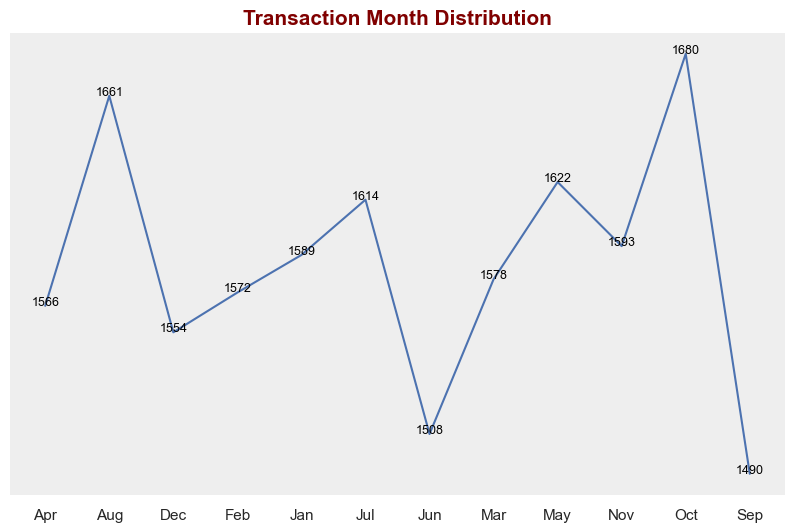

In [43]:
# Create new column Transaction Month
df['transaction_month'] = df['transaction_date'].dt.strftime('%b')

# Count the number of tranactions in each month
transaction_month = df['transaction_month'].value_counts().sort_index()

# Create the seaborn bar plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(y=transaction_month.values, x=transaction_month.index)
sns.despine(left=True, bottom=True)

# Annotate the bars with their heights
for i, value in enumerate(transaction_month.values):
    plt.text(i, value + 0.3, str(value), ha='center', fontsize=9, color='black')

ax.set_facecolor('#eeeeee')
ax.grid(False)
ax.set_yticks([])

# Set labels and title
plt.xlabel(None)
plt.ylabel(None)
plt.title('Transaction Month Distribution', fontsize=15, color='maroon', fontweight='bold')

plt.show()

#print(f'The number of {tenure_count.index[0]} customers is {tenure_count.values[0]}, {tenure_count.index[1]} customers is {tenure_count.values[1]}, {tenure_count.index[2]} customers is {tenure_count.values[2]}, and {tenure_count.index[3]} customers is {tenure_count.values[3]}')

The plot above show that all the month have close number of transactions in the given year with October being the most busy month at the store in the year and in the month before it, September low transactions were recorded.

## Online Order

In [44]:
df['online_order'].unique()

array([ 0.,  1., nan])

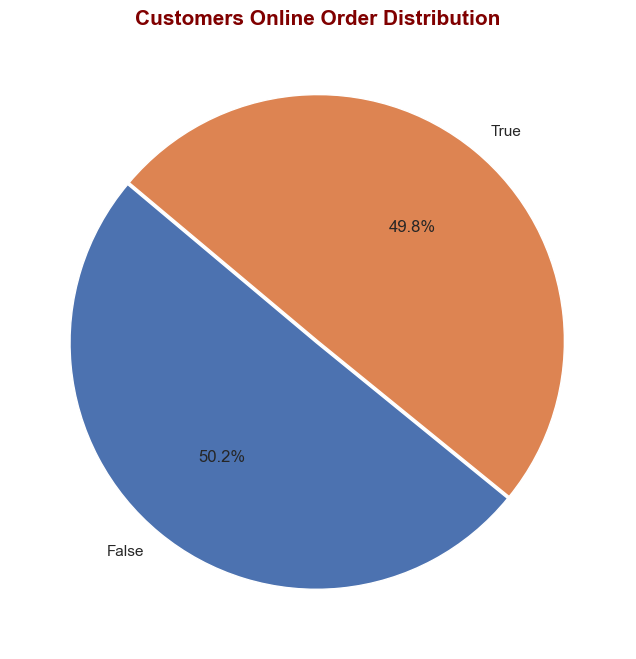

 The number of customers that use online order (True) are 1654, while the number of customers that does not use online order (False) are 1670.


In [45]:
# Drop the NAN values in the column
df = df.dropna(subset=['online_order'])
                                  
# Change the value in the column to True and False after converting the data type from float to integer
#df['online_order'] = df['online_order'].astype(int)

df['online_order'].replace({1: 'True', 0: 'False'}, inplace=True)


# Drop the transaction count duplicates to get the unique number of customers
unique_customers_df = df.drop_duplicates(subset='customer_id')

# Get car count
order_counts = unique_customers_df['online_order'].value_counts()

# Plot the pie chart
explode = (0.01, 0)  # Explode the first slice (owns car) by 0.1

plt.figure(figsize=(8, 8))
plt.pie(order_counts, labels=order_counts.index, autopct='%1.1f%%', explode=explode, startangle=140)

# Set title
plt.title('Customers Online Order Distribution', fontsize=15, color='maroon', fontweight='bold')

plt.show()

print(f' The number of customers that use online order ({order_counts.index[1]}) are {order_counts.values[1]}, while the number of customers that does not use online order ({order_counts.index[0]}) are {order_counts.values[0]}.')

## Order Status

In [46]:
df['order_status'].unique()

array(['Approved', 'Cancelled'], dtype=object)

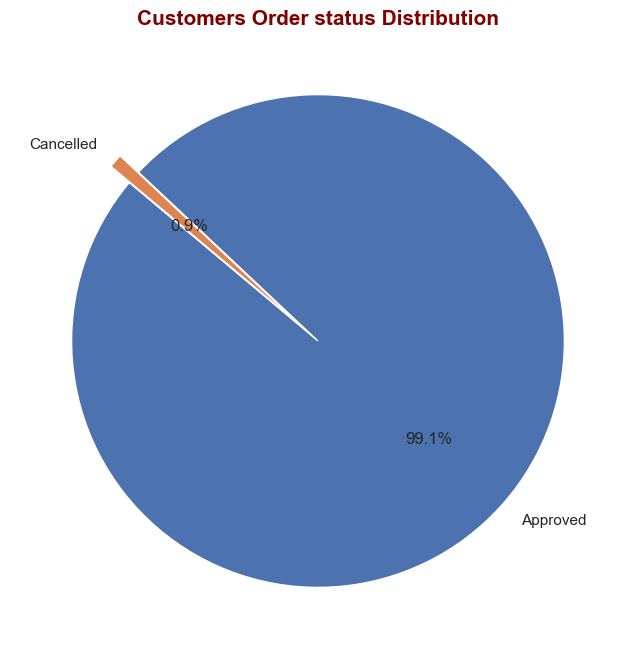

 3294 customers has thier order Approved , while 30 customers has thier order Cancelled


In [47]:
# To show customer count for each order status, we drop the transaction count duplicates to get the unique number of customers
unique_customers_df = df.drop_duplicates(subset='customer_id')

# Count of order status
status_count = df['order_status'].value_counts()

# Drop the transaction count duplicates to get the unique number of customers
unique_customers_df = df.drop_duplicates(subset='customer_id')

# Get car count
status_count = unique_customers_df['order_status'].value_counts()

# Plot the pie chart
explode = (0, 0.1)  # Explode the first slice (owns car) by 0.1

plt.figure(figsize=(8, 8))
plt.pie(status_count, labels=status_count.index, autopct='%1.1f%%', explode=explode, startangle=140)

# Set title
plt.title('Customers Order status Distribution', fontsize=15, color='maroon', fontweight='bold')

plt.show()

print(f' {status_count.values[0]} customers has thier order {status_count.index[0]} , while {status_count.values[1]} customers has thier order {status_count.index[1]}')

The plot above shows 99% of customers that made their order online successfully have their order approved.

## Brand

In [48]:
df['brand'].unique()

array(['OHM Cycles', 'Solex', 'Trek Bicycles', 'Norco Bicycles',
       'Giant Bicycles', 'WeareA2B', nan], dtype=object)

The Brand column seven distinct values including the NANs. Checking the number of NANs in the column will help in deciding removing all NANs or replacing it.

In [49]:
brand = df['brand']

print(brand.value_counts())

print(f'There are {brand.isnull().sum()} NULLs values in the column')

Solex             3996
Giant Bicycles    3093
WeareA2B          3076
OHM Cycles        2846
Trek Bicycles     2794
Norco Bicycles    2704
Name: brand, dtype: int64
There are 177 NULLs values in the column


There are 184 NULLs value in the column. Dropping them won't affect the structure of the dataframe.

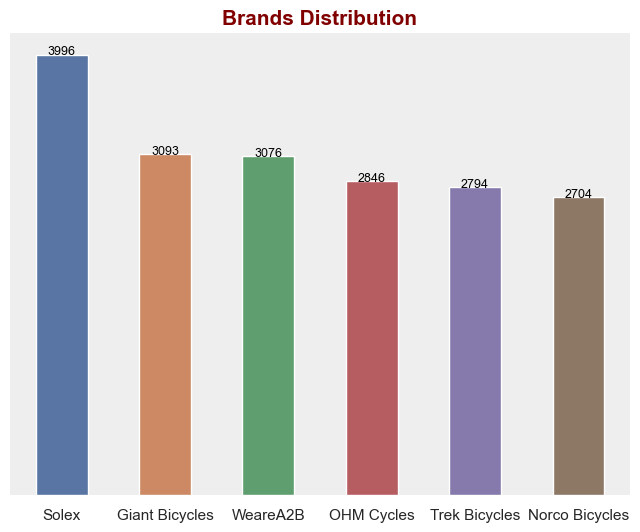

In [50]:
# Drop the NAN values in the column
df = df.dropna(subset=['brand'])

# To show customer count for each brands, we drop the transaction count duplicates to get the unique number of customers
unique_customers_df = df.drop_duplicates(subset='customer_id')

brand_count = df['brand'].value_counts()

# Create the seaborn bar plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=brand_count.index, y=brand_count.values, width=.5)
sns.despine(left=True, bottom=True)

# Annotate the bars with their heights
for i, value in enumerate(brand_count.values):
    plt.text(i, value + 0.3, str(value), ha='center', fontsize=9, color='black')

ax.set_facecolor('#eeeeee')
ax.grid(False)
ax.set_yticks([])

# Set labels and title
plt.xlabel(None)
plt.ylabel(None)
plt.title('Brands Distribution', fontsize=15, color='maroon', fontweight='bold')

plt.show()

#print(f' The number of customers that use online order ({order_count.index[1]}) are {order_count.values[1]}, while the number of customers that does not use online order ({order_count.index[0]}) are {order_count.values[0]}')

#### The chart above shows that the Solex brand is the best selling brand in the store and the Norco Bicycles have the lowest purchases.

## Product Line

In [51]:
df['product_line'].unique()

array(['Standard', 'Road', 'Mountain', 'Touring'], dtype=object)

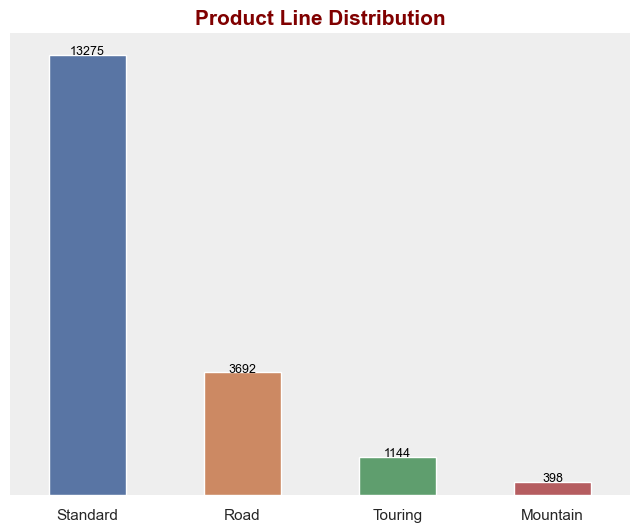

In [52]:
# To show customer count for each product line, we drop the transaction count duplicates to get the unique number of customers
unique_customers_df = df.drop_duplicates(subset='customer_id')

pro_line_count = df['product_line'].value_counts()

# Create the seaborn bar plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=pro_line_count.index, y=pro_line_count.values, width=.5)
sns.despine(left=True, bottom=True)

# Annotate the bars with their heights
for i, value in enumerate(pro_line_count.values):
    plt.text(i, value + 0.3, str(value), ha='center', fontsize=9, color='black')

ax.set_facecolor('#eeeeee')
ax.grid(False)
ax.set_yticks([])

# Set labels and title
plt.grid(False)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Product Line Distribution', fontsize=15, color='maroon', fontweight='bold')

plt.show()

From the above, it can be seen that the standard bikes were the most popular among the customers. The road, touring, and mountain bikes respectfully were least popular with the customers.

## Product Size

In [53]:
df['product_size'].unique()

array(['medium', 'small', 'large'], dtype=object)

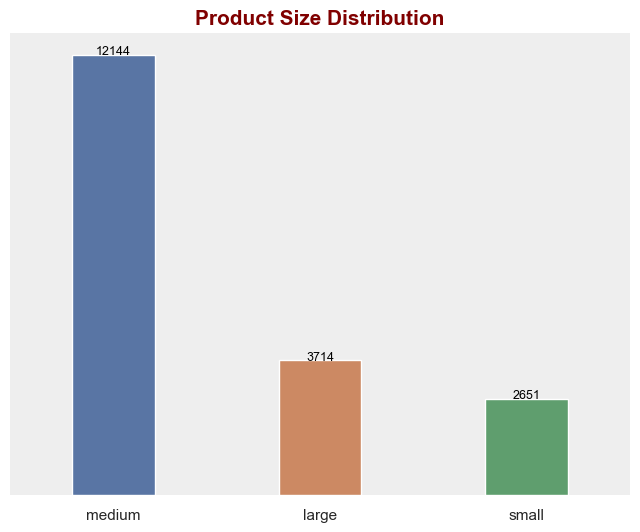

In [54]:
# To show customer count for each product size, we drop the transaction count duplicates to get the unique number of customers
unique_customers_df = df.drop_duplicates(subset='customer_id')

pro_size_count = df['product_size'].value_counts()

# Create the seaborn bar plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=pro_size_count.index, y=pro_size_count.values, width=.4)
sns.despine(left=True, bottom=True)

# Annotate the bars with their heights
for i, value in enumerate(pro_size_count.values):
    plt.text(i, value + 0.3, str(value), ha='center', fontsize=9, color='black')

ax.set_facecolor('#eeeeee')
ax.grid(False)
ax.set_yticks([])

# Set labels and title
plt.xlabel(None)
plt.ylabel(None)
plt.title('Product Size Distribution', fontsize=15, color='maroon', fontweight='bold')

plt.show()

Medium size bikes were more purchased by the customers. Large and small bike have low purchase counts by the customers.

### List Price

In [55]:
list_price = df['list_price']

print(list_price.describe())

print("Null Count:", list_price.isnull().sum())

print(f"The maximum product list price is ${list_price.max()},  minimum is ${list_price.min()}, and the average list price is ${list_price.mean().round(2)}")

count    18509.000000
mean      1106.512786
std        582.443256
min         12.010000
25%        575.270000
50%       1163.890000
75%       1577.530000
max       2091.470000
Name: list_price, dtype: float64
Null Count: 0
The maximum product list price is $2091.47,  minimum is $12.01, and the average list price is $1106.51


### Standard Cost

In [56]:
std_cost = df['standard_cost']

print(std_cost.describe())

print("Null Count:", std_cost.isnull().sum())
print()
print(f"The maximum product standard cost is ${std_cost.max()},  minimum is ${std_cost.min()}, and the average standard cost is ${std_cost.mean().round(2)}")

count    18509.000000
mean       556.098845
std        405.715763
min          7.210000
25%        215.140000
50%        507.580000
75%        795.100000
max       1759.850000
Name: standard_cost, dtype: float64
Null Count: 0

The maximum product standard cost is $1759.85,  minimum is $7.21, and the average standard cost is $556.1


## Product First Sold Date

Extract new column 'Year' from the Product First Sold Date column to have more spefic view on product historical sales by year

In [57]:
#Convert column to current date
df['product_first_sold_date'] = pd.to_datetime(df['product_first_sold_date'], format='%Y/%m/%d')

## Calculation for Revenue Gained

In [58]:
df['revenue'] = df['list_price'] - df['standard_cost']

df['revenue'].describe()

count    18509.000000
mean       550.413941
std        493.160645
min          4.800000
25%        133.780000
50%        445.210000
75%        827.160000
max       1702.550000
Name: revenue, dtype: float64

#### The chart above shows most of the products were first sold to the customers in 2015. 

## Calculation of Customers Rank and Value

In [59]:
# Calculate Transaction Count
df['transaction_count'] = df.groupby(['customer_id'])['transaction_id'].transform('count')

# Group by and aggregate the data
df = df.groupby(['customer_id', 'first_name', 'last_name', 'transaction_id', 'product_id', 'state', 
                        'property_valuation','property_valuation_group','gender', 'past_3_years_bike_related_purchases', 
                        'past_3_years_bike_related_activity', 'age', 'age_group', 'job_title', 'job_industry_category', 'wealth_segment',
                        'owns_car', 'deceased_indicator', 'tenure', 'tenure_group', 'transaction_date', 'transaction_month', 'online_order',
                        'order_status','brand', 'product_line', 'product_class', 'product_size', 'list_price',
                        'standard_cost','revenue','product_first_sold_date']).agg(
                            transaction_count=('transaction_count', 'sum')).reset_index()

# Sort by transaction_count in descending order
df = df.sort_values(by='transaction_count', ascending=False)

# Calculate transaction_percentage
transaction_count = df['transaction_count'].count()
df['transaction_percentage'] = (df['transaction_count'] * 100.0 / transaction_count
                                                  ).round(2)

# Calculate Rank
df['Rank'] = df['transaction_count'].rank(ascending=False, method='min').astype(int)

# Calculate Value based on a threshold (mean transaction_count)
transaction_count_threshold = 0.40 * df['transaction_count'].max()
df['customer_value'] = (df['transaction_count'] > transaction_count_threshold).astype(int)

# Display the result
print(f'Transaction Count Threshold: {transaction_count_threshold:.2f}. \n The threshold is set at 40% of the highest transaction')
print(df['customer_value'].value_counts())
df

Transaction Count Threshold: 5.60. 
 The threshold is set at 40% of the highest transaction
1    11674
0     6255
Name: customer_value, dtype: int64


customer_id first_name    last_name  transaction_id  product_id  \
5564          1068     Frazer     Searston           11472          29   
11303         2183     Jillie       Fyndon             134          78   
5559          1068     Frazer     Searston            4038          97   
5560          1068     Frazer     Searston            4317          69   
5561          1068     Frazer     Searston            4437          99   
...            ...        ...          ...             ...         ...   
7166          1387    Natalee      Comport            3351          94   
9677          1865  Isabelita    Kitchener            7405          21   
12118         2352      Cilka       Dabbes           14554          54   
14833         2863  Alisander  Fetherstone            2375          67   
9972          1921     Cybill        Wakes           14249          81   

                 state  property_valuation property_valuation_group  gender  \
5564   New South Wales                   8       Moderate Valuation    Male   
11303       Queensland                   4            Low Valuation  Female   
5559   New South Wales                   8       Moderate Valuation    Male   
5560   New South Wales                   8       Moderate Valuation    Male   
5561   New South Wales                   8       Moderate Valuation    Male   
...                ...                 ...                      ...     ...   
7166          Victoria                   6       Moderate Valuation  Female   
9677          Victoria                   9           High Valuation  Female   
12118         Victoria                  10           High Valuation  Female   
14833  New South Wales                   3            Low Valuation    Male   
9972   New South Wales                   9           High Valuation  Female   

       past_3_years_bike_related_purchases past_3_years_bike_related_activity  \
5564                                     5                       Low Activity   
11303                                   61                      High Activity   
5559                                     5                       Low Activity   
5560                                     5                       Low Activity   
5561                                     5                       Low Activity   
...                                    ...                                ...   
7166                                    33                  Moderate Activity   
9677                                    35                  Moderate Activity   
12118                                   76                      High Activity   
14833                                   90                 Very High Activity   
9972                                    70                      High Activity   

       age    age_group              job_title job_industry_category  \
5564    29     Under 30             Healthcare                Health   
11303   52  Middle-aged  Programmer Analyst IV         Manufacturing   
5559    29     Under 30             Healthcare                Health   
5560    29     Under 30             Healthcare                Health   
5561    29     Under 30             Healthcare                Health   
...    ...          ...                    ...                   ...   
7166    46  Middle-aged      Chemical Engineer         Manufacturing   
9677    26     Under 30   Office Assistant III         Uncategorised   
12118   52  Middle-aged        Statistician II         Uncategorised   
14833   59  Middle-aged       Internal Auditor         Manufacturing   
9972    41  Middle-aged         Accountant III         Uncategorised   

      wealth_segment owns_car deceased_indicator  tenure tenure_group  \
5564   Mass Customer      Yes                 No       3          New   
11303  Mass Customer      Yes                 No       7      Regular   
5559   Mass Customer      Yes                 No       3          New   
5560   Mass Customer      Yes          

In [60]:
df.to_csv('cleaned_and_processed_Sprocket.csv')

# Data Visualization

### Using Pairplot to visualize relationship between the numerical values in each state.

<Figure size 2000x3500 with 0 Axes>

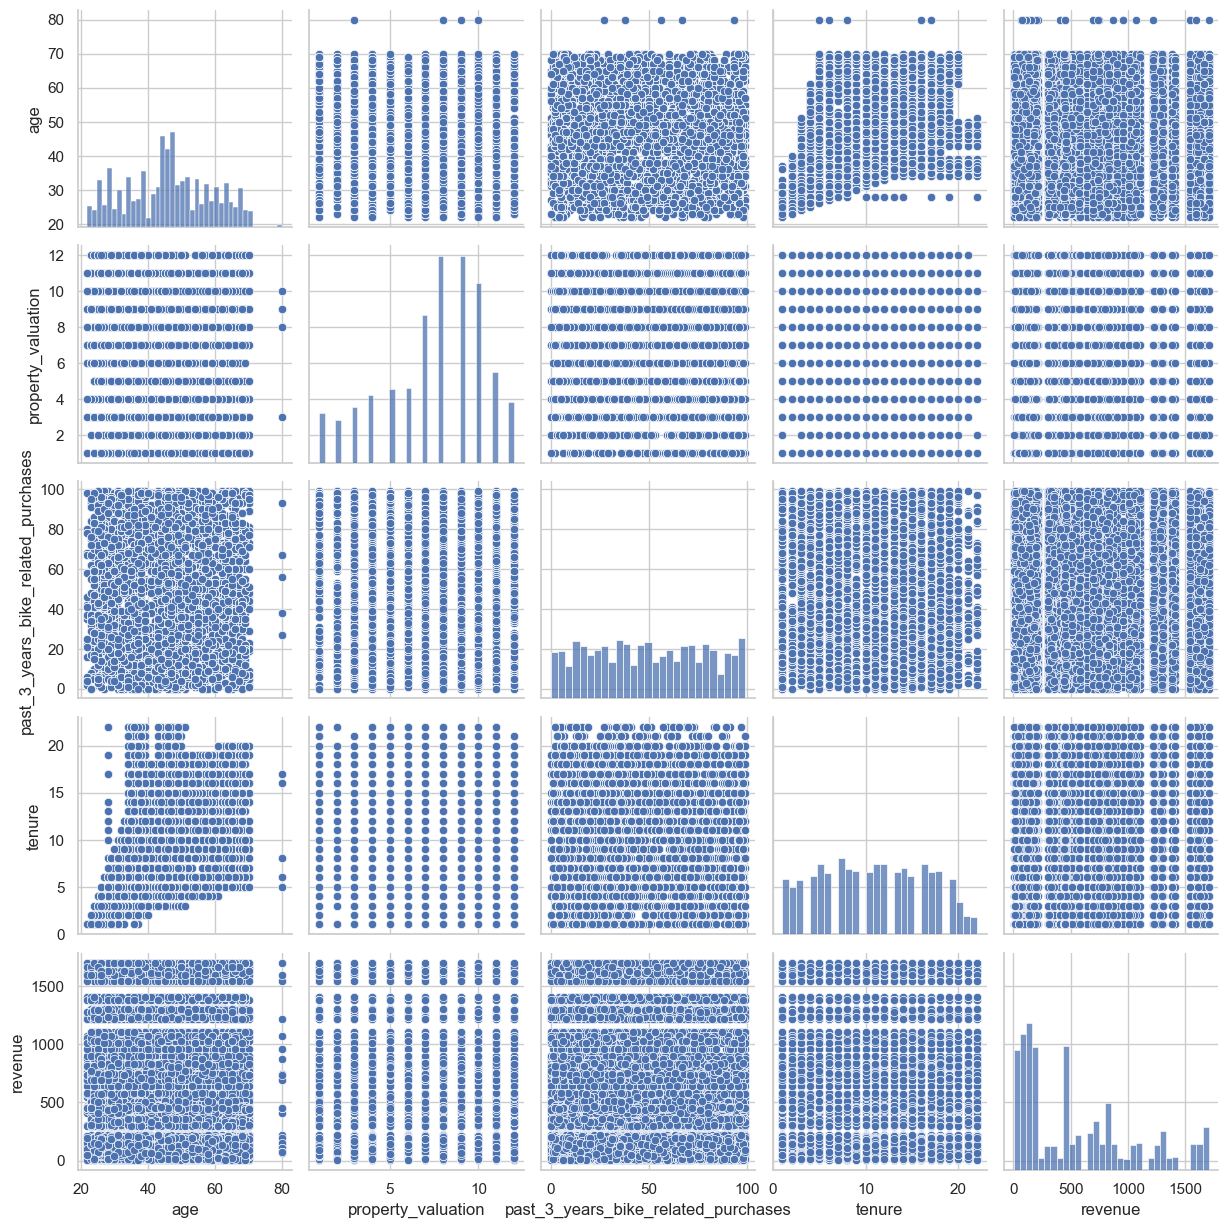

In [61]:
# Select the numerical features to plot
plt.figure(figsize=(20, 35))
sns.pairplot(df,
             vars= ['age', 'property_valuation', 'past_3_years_bike_related_purchases', 'tenure', 'revenue'],
             palette='husl');
plt.show()

#### The pairplot above shows the relationship between the numerical features and the distribution of each feature.



### For Heatmap:

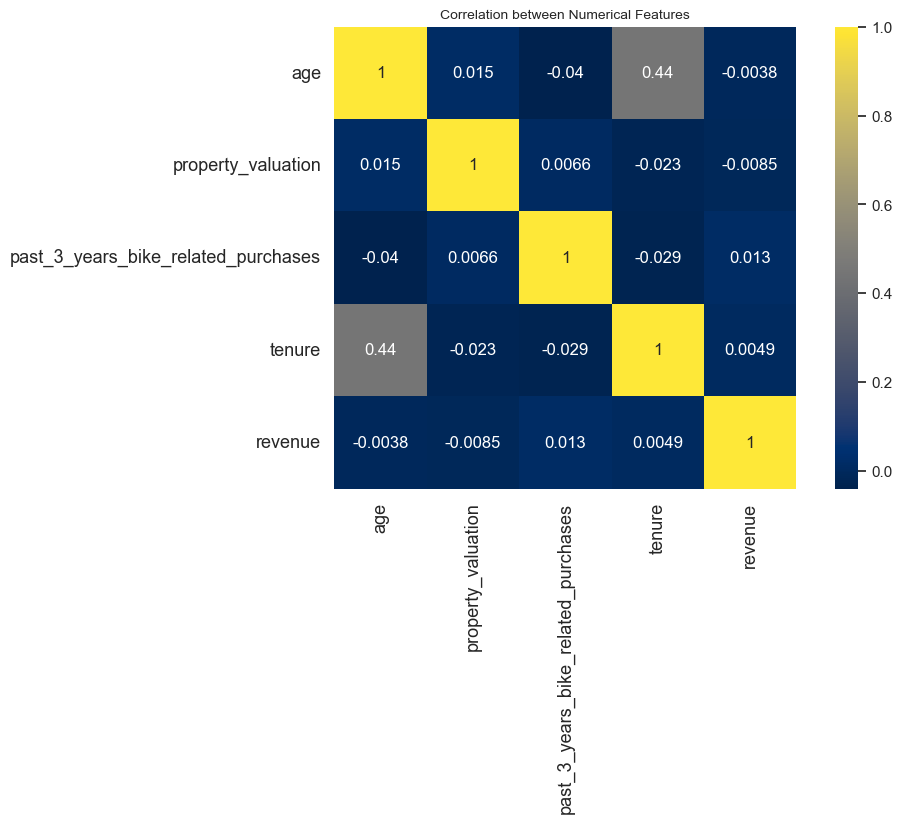

In [62]:
column_to_plot = ['age', 'property_valuation', 'past_3_years_bike_related_purchases', 'tenure', 'revenue']

plt.figure(figsize = (10, 6))
sns.heatmap(df[column_to_plot].corr(), annot=True, square=True, cmap='cividis')
plt.title("Correlation between Numerical Features", size=10)
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

#### The heatmap shows that the only correlation that exists between the numerical features is the one between the customers age and revenue the time(tenure) they have spent with the store. While there's no correlation between age and revenue and age and property valuation.

# Features Transaction Count by States

#### Visualizing the customers features transaction counts by state since the customers are all in three different states.

## Transaction Count for Numerical Features by States

In [63]:
import dash
from dash import html, dcc, Output, Input
import plotly.graph_objects as go
import plotly.io as pio
import pandas as pd

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H4("Property Valuation"),
    
    dcc.Dropdown(
        id='dropdown',
        options=[
            {'label': 'Property Valuation', 'value': 'property_valuation'},
            {'label': 'Age', 'value': 'age'},
            {'label': 'Tenure', 'value': 'tenure'},
            {'label': 'Past 3 Years Bike Related Purchases', 'value': 'past_3_years_bike_related_purchases'},
        ],
        value='property_valuation'
    ),
    
    dcc.Graph(id='mixed-chart'),
])

@app.callback(
    Output('mixed-chart', 'figure'),
    Input('dropdown', 'value')
)
def update_mixed_chart(selected_dropdown):
    # Group by state and attribute, and count the number of transactions in each group
    valuation_counts = df.groupby(['state', 'property_valuation']).size().reset_index(name='transaction_count')
    age_counts = df.groupby(['state', 'age']).size().reset_index(name='transaction_count')
    tenure_counts = df.groupby(['state', 'tenure']).size().reset_index(name='transaction_count')
    bike_related_counts = df.groupby(['state', 'past_3_years_bike_related_purchases']).size().reset_index(name='transaction_count')
    
    if selected_dropdown == 'property_valuation':
        data = valuation_counts
        x = 'property_valuation'
        title = 'Transaction Count by State and Property Valuation'
    elif selected_dropdown == 'age':
        data = age_counts
        x = 'age'
        title = 'Transaction Count by State and Age'
    elif selected_dropdown == 'tenure':
        data = tenure_counts
        x = 'tenure'
        title = 'Transaction Count by State and Tenure'
    elif selected_dropdown == 'past_3_years_bike_related_purchases':
        data = bike_related_counts
        x = 'past_3_years_bike_related_purchases'
        title = 'Transaction Count by State and Past 3 Years Bike Related Purchases'
    
    fig = go.Figure()

    for state in data['state'].unique():
        state_data = data[data['state'] == state]
        fig.add_trace(go.Scatter(
            x=state_data[x],
            y=state_data['transaction_count'],
            mode='markers',
            marker=dict(size=state_data['transaction_count'], sizemode='area'),
            name=state,
            hovertext=state_data['transaction_count']
        ))

    fig.update_layout(
        title=title,
        xaxis_title=x,
        yaxis_title='Transaction Counts',
        xaxis=dict(type='log', showgrid=False, visible=True, showticklabels=True),
        yaxis=dict(showgrid=False, visible=True, showticklabels=True),
        width=800,
        height=600
    )

    # Save the plot to a file
   # file_name = f"{selected_dropdown}_plot.png"
    #pio.write_image(fig, file_name)

    return fig

if __name__ == '__main__':
    app.run_server(debug=True, port=8091)

#### Property Valuation:
        New South Wales:
        Customers with property valuation of 9, 10, and 8 respectively have the highest transaction count.
        
        Queensland:
         Customers with property valuation of 7, 8, and 3 respectively have the highest transaction count.
        
        Victoria:
         Customers with property valuation of 8, 7, and 9 respectively has the highest transaction count.
         
      
#### Age:
        New South Wales:
        Customers aged between 45 - 50 have the highest transaction count.
        
        Queensland:
         Customers 46 have the highest transaction count.
        
        Victoria:
         Same as Queensland, customers aged 46 have the highest transaction count.
         
         
#### Tenure:
        New South Wales:
        Customers that have been patronising the store in between 20-22 months have the lowest transaction count while other
        transactions are high.
        
        Queensland:
         Customers with Tenure value of of 7 and 16 have the highest transactions count.
        
        Victoria:
         Customers with Tenure value of 5, 8, and 9 respectively have the highest transactions count.
               
         
#### Property Valuation:
        The higher the customers past 3 years bike related purchases, the highest the transaction count in the three states.

## Transaction Counts for Categorical Features by States

In [64]:
import dash
from dash import html, dcc, Output, Input
import plotly.graph_objects as go
import plotly.io as pio
import pandas as pd

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H4("Transaction Counts by Categorical Features"),
    
    dcc.Dropdown(
        id='dropdown',
        options=[
            {'label': 'Gender', 'value': 'gender'},
            {'label': 'Job Industry category', 'value': 'job_industry_category'},
            {'label': 'Wealth Segment', 'value': 'wealth_segment'},
            {'label': 'Age Group', 'value': 'age_group'},
            {'label': 'Property Valuation Group', 'value': 'property_valuation_group'},
            {'label': 'Past 3 Year Bike Related Activity', 'value': 'past_3_years_bike_related_activity'},
            {'label': 'Tenure Group', 'value': 'tenure_group'},
        ],
        value='gender'
    ),
    
    dcc.Graph(id='mixed-charts'),
])

@app.callback(
    Output('mixed-charts', 'figure'),
    Input('dropdown', 'value')
)
def update_mixed_charts(selected_dropdown):
    colors = ['teal', 'gainsboro']
    
    # Gender
    if selected_dropdown == 'gender':
        fig = go.Figure()
        for gender in df['gender'].unique():
            gender_data = df[df['gender'] == gender]
            fig.add_trace(go.Histogram(
                x=gender_data['state'],
                y=gender_data['transaction_count'],
                name=gender,
                marker_color=colors[0] if gender == 'Male' else colors[1],
                text=gender_data['transaction_count'],
                textposition='auto'
            ))
        title = 'Transaction Counts by Gender in Each State'
    
    # Property Valuation Group
    elif selected_dropdown == 'property_valuation_group':
        fig = go.Figure()
        for group in df['property_valuation_group'].unique():
            group_data = df[df['property_valuation_group'] == group]
            fig.add_trace(go.Histogram(
                x=group_data['state'],
                y=group_data['transaction_count'],
                name=group,
                text=group_data['transaction_count'],
                textposition='auto'
            ))
        title = 'Transaction Counts by Property Valuation Group in Each State'
    
    # Job Category
    elif selected_dropdown == 'job_industry_category':
        fig = go.Figure()
        for category in df['job_industry_category'].unique():
            category_data = df[df['job_industry_category'] == category]
            fig.add_trace(go.Histogram(
                x=category_data['state'],
                y=category_data['transaction_count'],
                name=category,
                text=category_data['transaction_count'],
                textposition='auto'
            ))
        title = 'Transaction Counts by Job Industry Category in Each State'
    
    # Wealth Segment
    elif selected_dropdown == 'wealth_segment':
        fig = go.Figure()
        for segment in df['wealth_segment'].unique():
            segment_data = df[df['wealth_segment'] == segment]
            fig.add_trace(go.Histogram(
                x=segment_data['state'],
                y=segment_data['transaction_count'],
                name=segment,
                text=segment_data['transaction_count'],
                textposition='auto'
            ))
        title = 'Transaction Counts by Wealth Segment in Each State'

    # Age Group
    elif selected_dropdown == 'age_group':
        fig = go.Figure()
        for group in df['age_group'].unique():
            group_data = df[df['age_group'] == group]
            fig.add_trace(go.Histogram(
                x=group_data['state'],
                y=group_data['transaction_count'],
                name=group,
                text=group_data['transaction_count'],
                textposition='auto'
            ))
        title = 'Transaction Counts by Age Group in Each State'
    
    # Past 3 Years Bike Related Activities
    elif selected_dropdown == 'past_3_years_bike_related_activity':
        fig = go.Figure()
        for activity in df['past_3_years_bike_related_activity'].unique():
            activity_data = df[df['past_3_years_bike_related_activity'] == activity]
            fig.add_trace(go.Histogram(
                x=activity_data['state'],
                y=activity_data['transaction_count'],
                name=activity,
                text=activity_data['transaction_count'],
                textposition='auto'
            ))
        title = 'Transaction Counts by Past 3 Years Bike Related Activity in Each State'

    # Tenure Group
    elif selected_dropdown == 'tenure_group':
        fig = go.Figure()
        for group in df['tenure_group'].unique():
            group_data = df[df['tenure_group'] == group]
            fig.add_trace(go.Histogram(
                x=group_data['state'],
                y=group_data['transaction_count'],
                name=group,
                text=group_data['transaction_count'],
                textposition='auto'
            ))
        title = 'Transaction Counts by Tenure Group in Each State'

    # Set plots layout
    fig.update_layout(
        title=title,
        xaxis_title='State',
        yaxis_title='Transaction Counts',
        barmode='group',
        xaxis=dict(showgrid=False, visible=True, showticklabels=True),
        yaxis=dict(showgrid=False, visible=True, showticklabels=True),
        width=800,
        height=600
    )

    # Save the plot to a file
  #  file_name = f"{selected_dropdown}_plot.png"
   # pio.write_image(fig, file_name)

    return fig

if __name__ == '__main__':
    app.run_server(debug=True, port=8092)

### Job Title Transaction Counts and Percentage by State 

In [65]:
import plotly.graph_objects as go

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H4("Transaction Count and Percentage Job Title"),
    
    dcc.Dropdown(
        id='state',
        options=[{'label': state, 'value': state} for state in df['state'].unique()],
        value=df['state'].unique()[0]
    ),
    dcc.Input(id='job-title-filter', type='text', placeholder='Filter by job title...'),
    
    dcc.Graph(id='table'),
])

@app.callback(
    Output('table', 'figure'),
    Input('state', 'value'),
    Input('job-title-filter', 'value')
)
def update_table(selected_state, job_title_filter):
    # Filter the data based on selected state
    df_state = df[df['state'] == selected_state]
    
    # Apply job title filter
    if job_title_filter:
        df_state = df_state[df_state['job_title'].str.contains(job_title_filter, case=False)]
    
    # Group by job title and calculate transaction count and percentage
    job_title_counts = df_state['job_title'].value_counts()
    total_transactions = len(df_state)
    job_title_percentage = (job_title_counts / total_transactions) * 100
      # Round the percentage to two decimal places
    job_title_percentage = job_title_percentage.round(2)
    
    # Create DataFrame for table display
    df_display = pd.DataFrame({
        'Job Title': job_title_counts.index,
        'Transaction Count': job_title_counts.values,
        'Transaction Percentage': job_title_percentage.values
    })
    
    # Create table figure
    fig = go.Figure(data=[go.Table(
        header=dict(values=list(df_display.columns), fill_color='paleturquoise', align='left'),
        cells=dict(values=[df_display['Job Title'], df_display['Transaction Count'], df_display['Transaction Percentage']],
                   fill_color='lavender', align='left'))])
    
    # Update layout
    fig.update_layout(title_text=f'Transaction Count and Percentage by Job Title in {selected_state}', width=800, height=600)
    
    return fig

if __name__ == '__main__':
    app.run_server(debug=True, port=8062)

### Transaction Counts by Other Categorical Features

In [73]:
import plotly.express as px
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H4("Transaction Counts by Categorical Features"),
    
    dcc.Dropdown(
        id='dropdown',
        options=[
            {'label': 'Online Order', 'value': 'online_order'},
            {'label': 'Deceased Indicator', 'value': 'deceased_indicator'},
            {'label': 'Order Status', 'value': 'order_status'},
            {'label': 'Owns Car', 'value': 'owns_car'},
        ],
        value='online_order'
    ),
    
    dcc.Graph(id='mixed-charts'),
])

@app.callback(
    Output('mixed-charts', 'figure'),
    Input('dropdown', 'value')
)
def update_mixed_charts(selected_dropdown):
    colors= ['teal', 'gainsboro']
    # Online Order
    if selected_dropdown == 'online_order':
        fig = px.histogram(df, x='state', color='online_order', barmode='group', text_auto=True,
                           title='Transaction Counts by Online Order in Each State', width=800, height=600,
                          color_discrete_sequence=colors)
        fig.update_layout(yaxis={'visible':False, 'showticklabels':False, 'showgrid':False})
    
    # Deceased Indicator
    elif selected_dropdown == 'deceased_indicator':
        fig = px.histogram(df, x='state', color='deceased_indicator', barmode='group', text_auto=True,
                           title='Transaction Counts by Deceased Indicator in Each State', width=800, height=600,
                          color_discrete_sequence=colors)
        fig.update_layout(yaxis={'visible':False, 'showticklabels':False, 'showgrid':False})
    
    # Order Status
    elif selected_dropdown == 'order_status':
        fig = px.histogram(df, x='state', color='order_status', barmode='group', text_auto=True,
                           title='Transaction Counts by Order Status in Each State', width=800, height=600,
                          color_discrete_sequence=colors)
        fig.update_layout(yaxis={'visible':False, 'showticklabels':False, 'showgrid':False})
    
    # Owns Car
    elif selected_dropdown == 'owns_car':
        fig = px.histogram(df, x='state', color='owns_car', barmode='group', text_auto=True,
                           title='Transaction Counts by Owns Car in Each State', width=800, height=600,
                          color_discrete_sequence=colors)
        fig.update_layout(yaxis={'visible':False, 'showticklabels':False, 'showgrid':False})  
    return fig

if __name__ == '__main__':
    app.run_server(debug=True, port=8082)

### Transaction Counts by Products

In [67]:
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H4("Transaction Counts by Products"),
    
    dcc.Dropdown(
        id='dropdown',
        options=[
            {'label': 'Brand', 'value': 'brand'},
            {'label': 'Product Class', 'value': 'product_class'},
            {'label': 'Product Line', 'value': 'product_line'},
            {'label': 'Product Size', 'value': 'product_size'},
        ],
        value='brand'
    ),
    
    dcc.Graph(id='mixed-charts'),
])

@app.callback(
    Output('mixed-charts', 'figure'),
    Input('dropdown', 'value')
)
def update_mixed_charts(selected_dropdown):
    colors= ['cyan', 'gainsboro', 'orange', 'azure', 'lightblue', 'aquamarine']
    fig = go.Figure()

    if selected_dropdown in ['brand', 'product_class', 'product_line', 'product_size']:
        data_grouped = df.groupby(['state', selected_dropdown]).size().reset_index(name='transaction_count')
        
        unique_items = data_grouped[selected_dropdown].unique()
        color_mapping = {item: colors[i % len(colors)] for i, item in enumerate(unique_items)}
        
        for item in unique_items:
            item_data = data_grouped[data_grouped[selected_dropdown] == item]
            fig.add_trace(go.Bar(
                x=item_data['state'],
                y=item_data['transaction_count'],
                name=item,
                text=item_data['transaction_count'],
                marker_color=color_mapping[item]
            ))
        
        title = f'Transaction Counts by {selected_dropdown.capitalize()} in Each State'
        
        fig.update_layout(
            title=title,
            xaxis_title='State',
            yaxis_title='Transaction Counts',
            barmode='group',
            xaxis=dict(showgrid=False, visible=True, showticklabels=True),
            yaxis=dict(showgrid=False, visible=False, showticklabels=False),
            width=800,
            height=600
        )
        
        # Save the plot to a file
        file_name = f"{selected_dropdown}_plot.png"
        pio.write_image(fig, file_name)
        
        return fig
    else:
        raise ValueError("Selected dropdown value is not valid.")

if __name__ == '__main__':
    app.run_server(debug=True, port=8083)

### Monthly Transactions in Each State

In [68]:
# Group by transaction_month and count the transactions
transaction_count = df.groupby(['transaction_month', 'state']).size().reset_index(name='count')

# Create the line plot
fig = px.line(transaction_count, x='transaction_month', y='count', text='count', color='state',
              title=f'Monthly transaction by states', width=800, height=600)

#fig.update_xaxes(showticklabels=False)
fig.update_layout(xaxis={'visible':True, 'showticklabels':True, 'showgrid':False})
fig.update_layout(yaxis={'visible':True, 'showticklabels':True, 'showgrid':False})

# Save the plot to a file
file_name = "monthly_transactions_by_state.png"
pio.write_image(fig, file_name)

fig.show()

#### From the above plots we can clearly tell the following interpretation:

#### Gender:
        New South Wales:
        Most: Female
        Moderate: Male
        
        Queensland:
        Most: Female
        Moderate: Male
        
        Victoria:
        Most: Both Female then Male
        

#### Property Valuation:
        New South Wales:
        Most: High Valuation (9-12)
        Moderate: Moderate Valuation (5-8)
        Least: Low Valuation (1-4)
        
        Queensland:
        Most: Moderate Valuation (5-8)
        Moderate: Low Valuation (1-4)
        Least:  High Valuation (9-12)
        
        Victoria:
        Most: Moderate Valuation (5-8)
        Moderate:  High Valuation (9-12)
        Least: Low Valuation (1-4)
        

#### Past 3 Years Bike Related Purchses:
        New South Wales:
        Most: Low Activities(0-19), Moderate Activities(20-39), High Activites(60-79), Average Activities(40-59), then Very
        High Activities(80-99) in that order.
        
        Queensland:
        Most: Average Activities(40-59), Low Activities(0-19), Moderate Activities(20-39), Very High Activites(60-79), then
        High Activities(80-99) in that order.
        
        Victoria:
        Most: Moderate Activities(20-39), Average Activities(40-59), Very High Activites(60-79), Low Activities(0-19), then
        High Activities(80-99) in that order.
        
        
#### Age Group:
        New South Wales:
        Most: Middle-Aged
        Moderate: Under-30
        Least: Senior Citizens
        
        Queensland:
        Most: Middle-Aged
        Moderate: Under-30
        Least: Senior Citizens
        
        Victoria:
        Most: Middle-Aged
        Moderate: Senior Citizens
        Least: Under-30
        

#### Job Induustry Category:
        New South Wales:
        Most: Manufactuiring, Financial Services, Uncategorized, then Health
        Moderate: Retail then Property
        Least: IT, Entertainment, Agriculture, then Telecommunication
        
        Queensland:
        Most:Manufactuiring, Financial Services, Uncategorized, then Health
        Moderate: Retail
        Least: Property, IT, Entertainment, Agriculture, then Telecommunication
        
        Victoria:
        Most:Manufactuiring, Financial Services, Uncategorized, then Health
        Moderate: Retail
        Least: Property, Entertainment, IT, Agriculture, then Telecommunication


#### Wealth Segment:
        New South Wales:
        Most: Mass Customers
        Moderate: High Newt Worth Customers
        Least: Affluent Customers
        
        Queensland:
        Most: Mass Customers
        Moderate: High Net Worth then Affluent Customers
        
        Victoria:
        Most: Mass Customers
        Moderate: High Newt Worth Customers
        Least: Affluent Customers
        
        
#### Owns Car:
        New South Wales:
        Most: Yes then No
        
        Queensland:
        Most: No then Yes
        
        Victoria:
        Most: Yes then No
        
        
#### Tenure:
        New South Wales:
        Most: Regular then Loyal
        Moderate: New
        Least: Long-term
        
        Queensland:
        Most: Regular then Loyal
        Moderate: New
        Least: Long-term
        
        Victoria:
        Most: Regular then Loyal
        Moderate: New
        Least: Long-term
        

#### Job Title:
        New South Wales:
        Top three: Production Workers, Finanacial Officers, and Healthcare workers
        
        Queensland:
        Top three: Financial Officers, Production Workers, and Senior Quality, Engineers.
        
        Victoria:
        Top three: Production Workers, Clinical Specialists, and Healthcare workers.
        

#### Brand:
        The top three Brands in the three states are the Solex brand, Giant Bicycles brand, and the WeareA2B brands
        

#### Product Class:
        The medium class products were the most purchased in the three states. The other other two classes recorded lower
        sales.
        
        
#### Product Line:
       The Standard line bikes were the most popular among the customers. The others were recorded low sales. The Mountain
       bikes line did better than the Touring and Road bikes.
        

#### Product Size:
       When loking at the sizes of the bikes, the medium sized bikes were thr most purchased leading the other sizes with huge
       margin. The small bikes were the least purchased.

## Customers Demographics Vs Products

In [69]:
# Set up Dash app
app = dash.Dash(__name__)

# Define dropdown options
options_1 = ['gender', 'job_industry_category', 'age_group', 'wealth_segment', 'property_valuation_group', 'transaction_month', 'tenure_group']
options_2 = ['brand', 'product_class', 'product_line', 'product_size']

# Define layout
app.layout = html.Div([
    html.H1("Transaction Counts by Group"),
    dcc.Dropdown(
        id='dropdown_1',
        options=[{'label': col, 'value': col} for col in options_1],
        value=options_1[0]
    ),
    dcc.Dropdown(
        id='dropdown_2',
        options=[{'label': col, 'value': col} for col in options_2],
        value=options_2[0]
    ),
    html.Div(id='graph-container')
])

# Define callback
@app.callback(
    Output('graph-container', 'children'),
    [Input('dropdown_1', 'value'),
     Input('dropdown_2', 'value')]
)
def update_graph(selected_option_1, selected_option_2):
    # Filter dataframe based on selected dropdown values
    filtered_df = df[[selected_option_1, selected_option_2]]
    
    # Check if one of the options is 'transaction_month'
    if 'transaction_month' in [selected_option_1, selected_option_2]:
        grouped_df = filtered_df.groupby([selected_option_1, selected_option_2]).size().reset_index(name='count')
        # If yes, create a line plot
        fig = px.line(grouped_df, x='transaction_month', y='count', color=selected_option_2, width=800, height=600,
                      title=f'Transaction Counts by {selected_option_1.capitalize()} and {selected_option_2.capitalize()}')
        fig.write_image(f'plot_{selected_option_1}_{selected_option_2}.png')  # Save plot to file
        return dcc.Graph(figure=fig)
    
    # Check if one of the options is 'job_title'
    elif 'job_title' in [selected_option_1, selected_option_2]:
        # If yes, create a table
        df_display = filtered_df.groupby([selected_option_1, selected_option_2]).size().reset_index(name='Transaction Count')
        df_display = df_display.sort_values(by='Transaction Count', ascending=False)
        # Create table figure
        fig = go.Figure(data=[go.Table(
            header=dict(values=list(df_display.columns), fill_color='paleturquoise', align='left'),
            cells=dict(values=[df_display['job_title'], df_display[selected_option_2], df_display['Transaction Count']],
                       fill_color='lavender', align='left'))])
        fig.update_layout(width=800, height=600)
        fig.write_image(f'plot_{selected_option_1}_{selected_option_2}.png')  # Save plot to file
        return dcc.Graph(figure=fig)

    
    
    else:
        # Otherwise, create a grouped bar chart
        colors= ['purple', 'orange', 'teal', 'cyan', 'lightblue', 'aquamarine']
        
        grouped_df = filtered_df.groupby([selected_option_1, selected_option_2]).size().reset_index(name='count')
        fig = px.histogram(grouped_df, x=selected_option_1, y='count', color=selected_option_2, barmode='group',
                           text_auto=True, color_discrete_sequence=colors, width=800, height=600,
                     labels={selected_option_1: selected_option_1.capitalize(), 'count': 'Transaction Count'},
                     title=f'Transaction Counts by {selected_option_1.capitalize()} and {selected_option_2.capitalize()}')
        fig.write_image(f'plot_{selected_option_1}_{selected_option_2}.png')  # Save plot to file
        return dcc.Graph(figure=fig)

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

## Features Vs Customers value

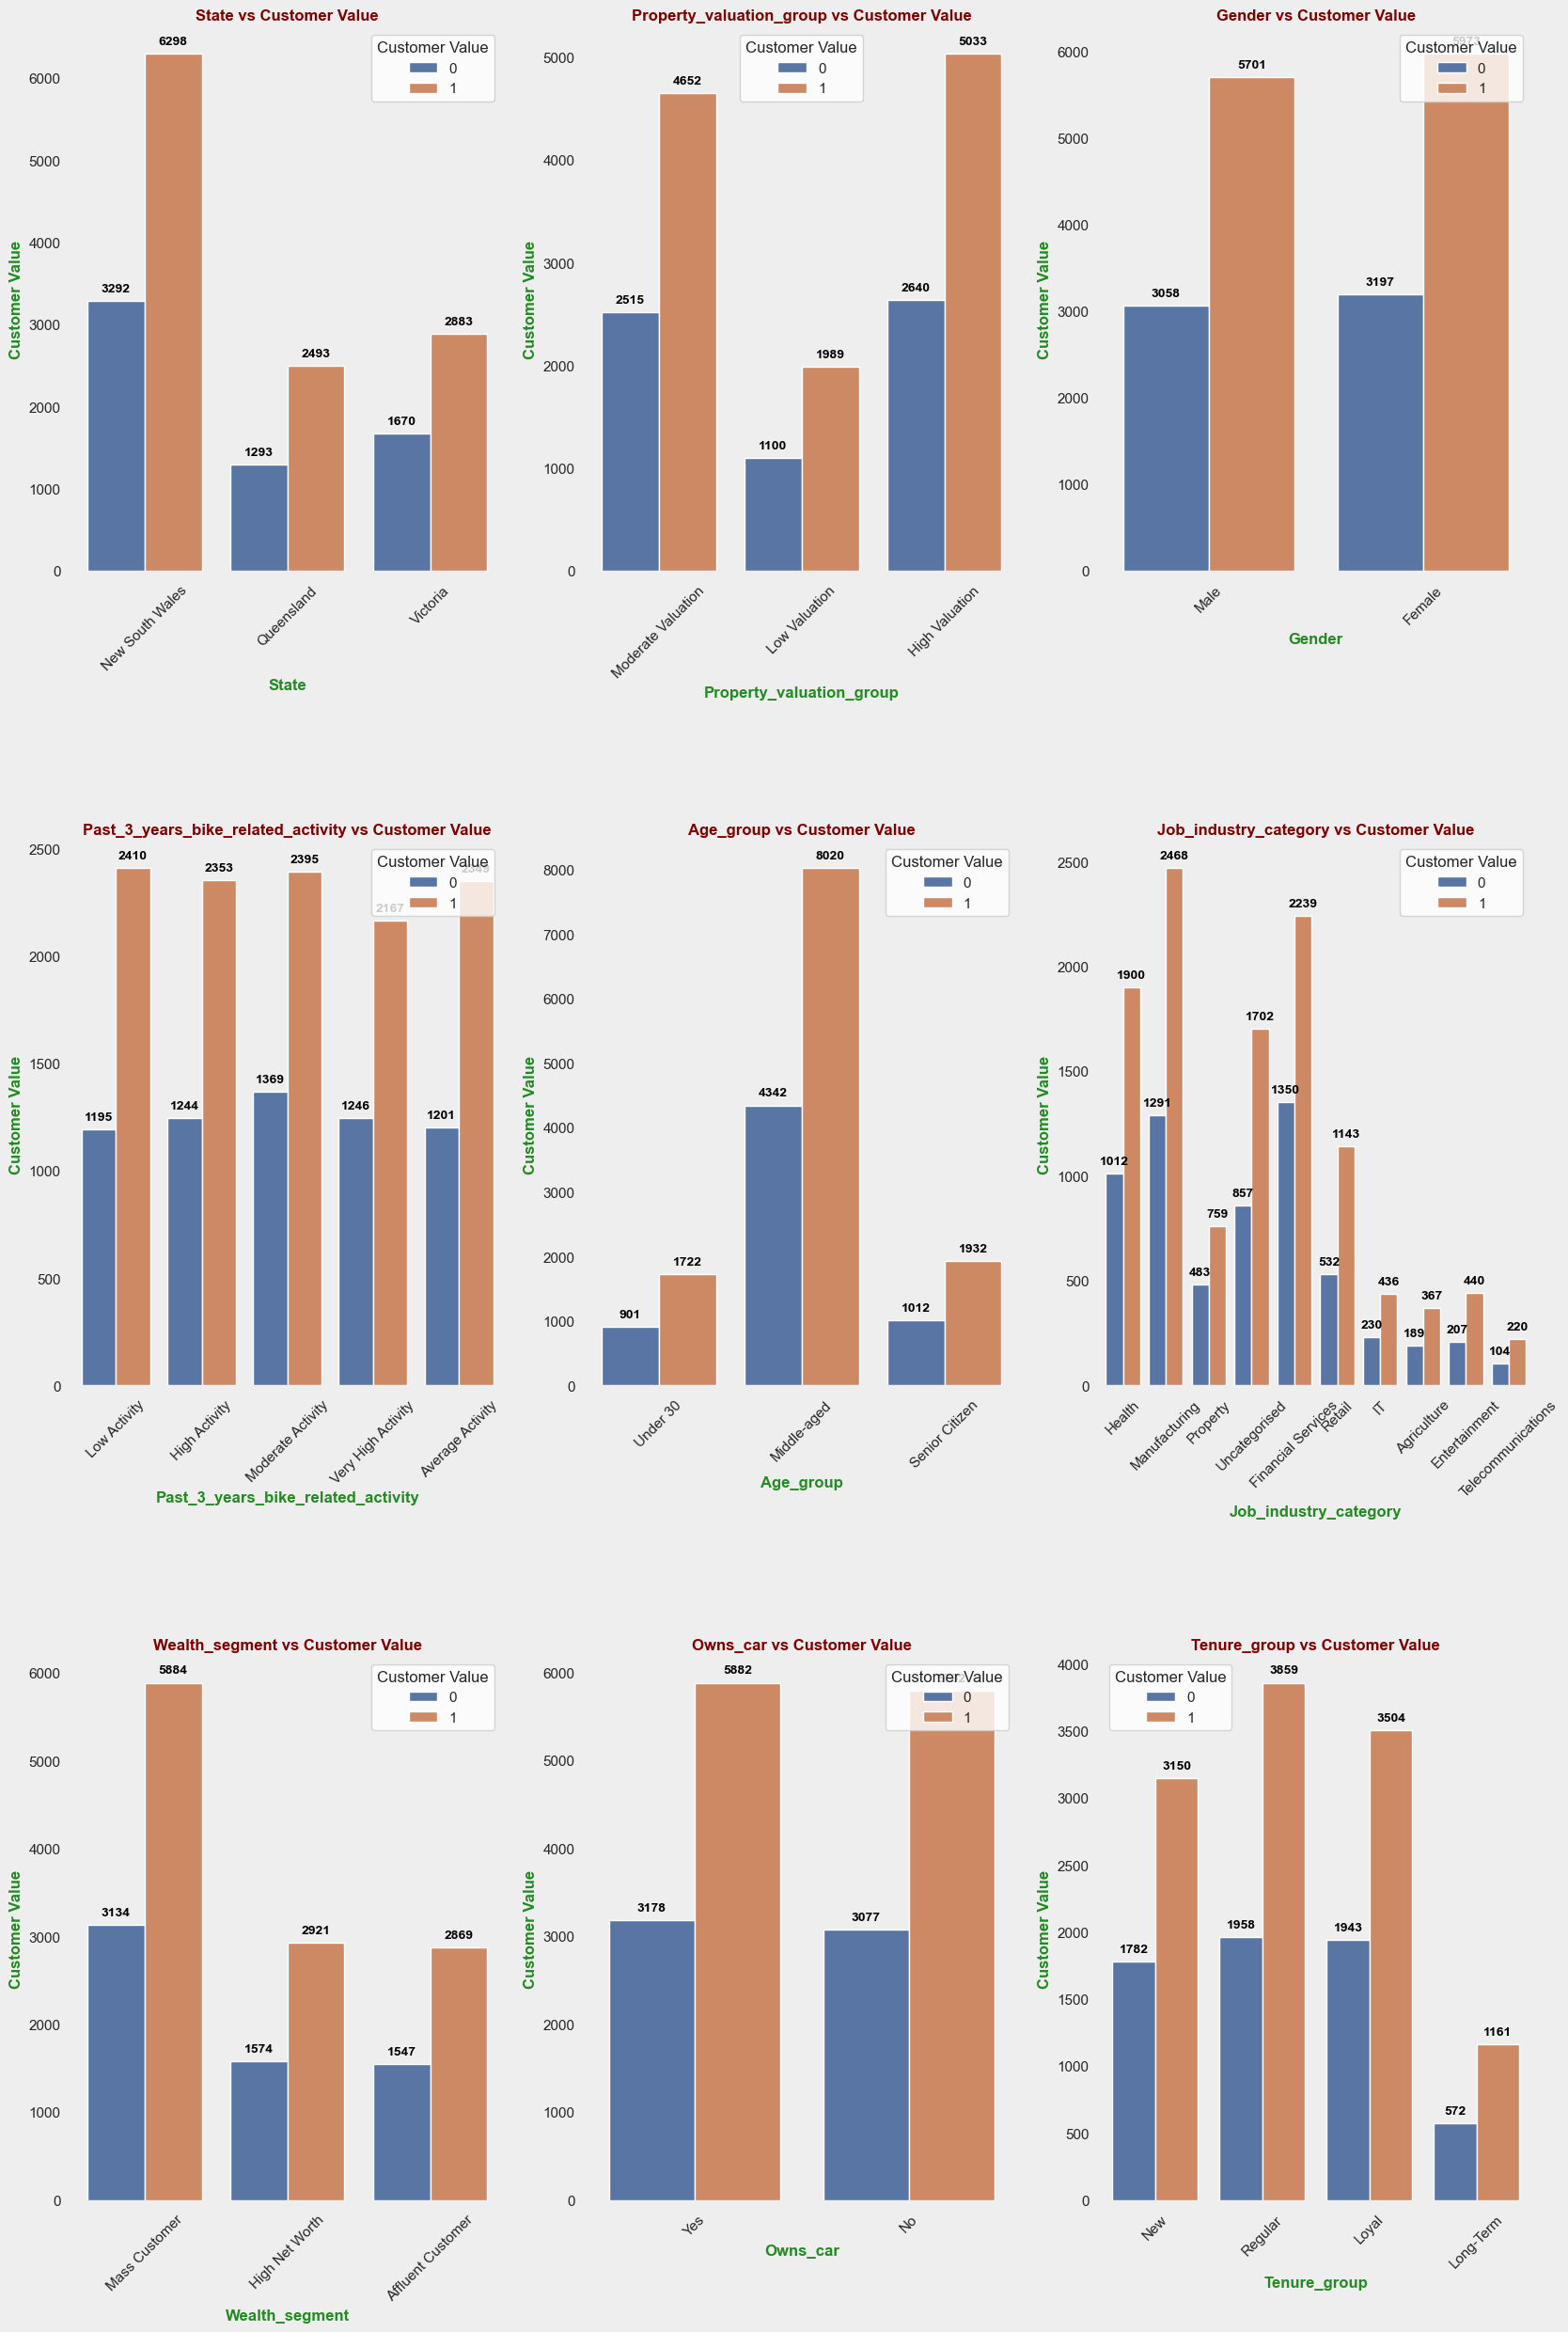

In [70]:
fig, axes = plt.subplots(3, 3, figsize=(20, 30))
fig.subplots_adjust(hspace=0.5)
fig.set_facecolor('#eeeeee') # background color

# Define the columns to plot
columns_to_plot = ['state', 'property_valuation_group', 'gender', 'past_3_years_bike_related_activity', 'age_group', 'job_industry_category', 'wealth_segment', 'owns_car', 'tenure_group']


# Iterate over the columns and create countplots
for i, column in enumerate(columns_to_plot):
    row = i // 3
    col = i % 3
    
    ax = axes[row, col]
    
    # Create a countplot
    sns.countplot(x=column, hue='customer_value', data=df, ax=ax)
    sns.despine(left=True, bottom=True)
    
    # Add value labels to the bars and convert values to int with decimals
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}',  # Format as currency with thousands separator
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 5),  # Offset for the text above the bar
                    textcoords='offset points',  # Set text coordination
                    ha='center',  # Horizontal alignment
                    va='bottom',  # Vertical alignment
                    fontsize=10,  # Font size for the text
                    color='black',  # Color of the text
                    weight='bold'  # Text weight (e.g., 'bold', 'normal')
                   )
        
    
    # Customize titles and labels
    ax.set_facecolor('#eeeeee')
    ax.grid(False)
    ax.set_title(f'{column.capitalize()} vs Customer Value', fontweight='bold', color='maroon')
    ax.set_xlabel(column.capitalize(), color='forestgreen', fontweight='bold')
    ax.set_ylabel('Customer Value', color='forestgreen', fontweight='bold')
    ax.legend(title='Customer Value')
    ax.tick_params(axis='x', labelrotation=45)

# Remove empty subplots
for i in range(len(columns_to_plot), 9):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

# Save the figure
plt.savefig('customer_value.png', bbox_inches='tight', pad_inches=0)

plt.show()

#### From the above plots we can clearly tell the following interpretation:
In all the features valuable customers carried out more transaction than non-valuable customers across all metrics including in each state.

# Plots of Features by Revenue

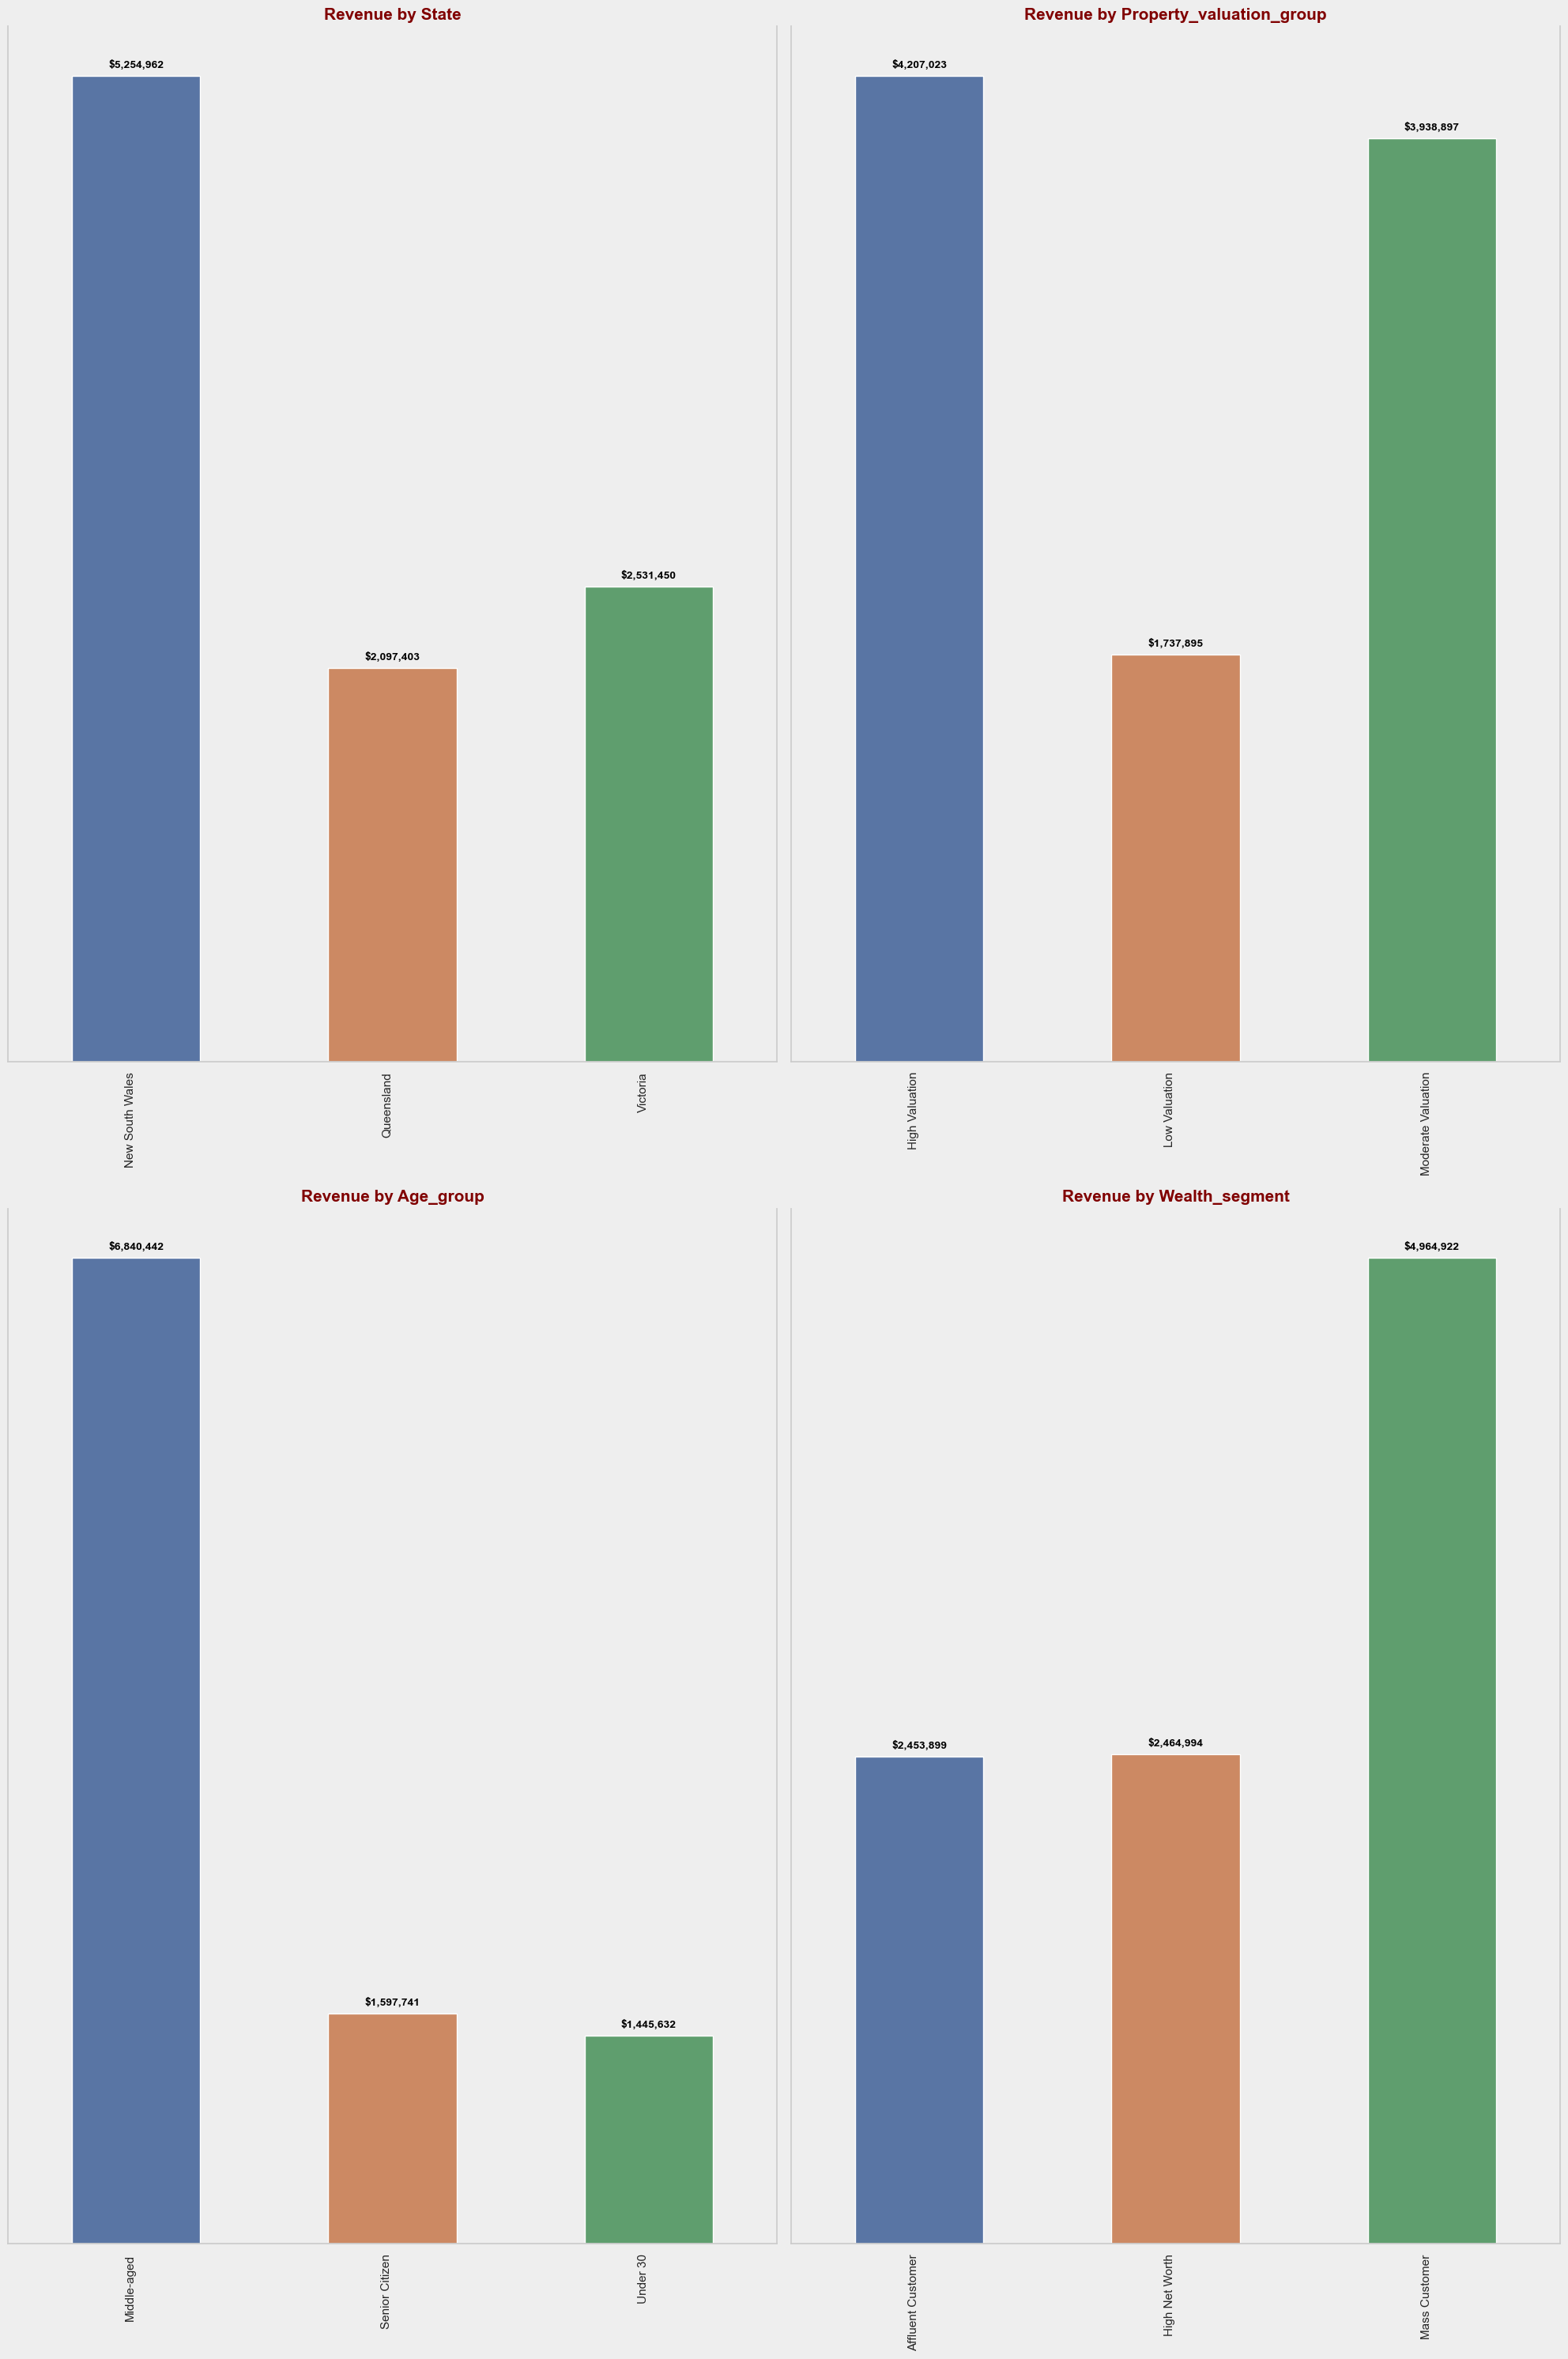

In [71]:
# Select columns to plot
column_to_plot = ['state', 'property_valuation_group', 'age_group', 'wealth_segment']

fig, axes = plt.subplots(2, 2, figsize=(20, 30))  # Define the figure and axes
#plt.subplots_adjust(wspace=0.4, hspace=0.8)
fig.set_facecolor('#eeeeee')  # background color
#fig.subplots_adjust(hspace=8)  # Set plots margin 

# Loop through each category
for i, category in enumerate(column_to_plot):
    ax = axes[i // 2, i % 2]
    
    # Group the data by the category and calculate sum of revenue
    grouped_data = df.groupby(category)['revenue'].sum().reset_index()
    
    # Convert x-axis values to strings
    grouped_data[category] = grouped_data[category].astype(str)
    
# Plot the barplot

    # Plot vertical bar plot
    sns.barplot(x=category, y='revenue', data=grouped_data, width=0.5, ax=ax)
    sns.despine(right=False, bottom=False)


    ax.set_facecolor('#eeeeee') # Set chart backgroud
    ax.grid(False) # Remove gridlines

    ax.set_title(f'Revenue by {category.capitalize()}', color='maroon', fontsize=15, fontweight='bold')

    # Set x-axis ticks and labels
    #ax.set_xticks(range(len(grouped_data)))
    ax.set_xticklabels(grouped_data[category], ha='right', rotation=90)
    ax.set_xlabel(None)
    ax.set_ylabel('')
    ax.set_yticks([])

    # Add value text to the bars
    for x, y in enumerate(grouped_data['revenue']):
        ax.annotate(f'${int(y):,}',  # Format as currency with thousands separator
                    xy=(x, y),
                    xytext=(0, 5),  # Offset for the text above the bar
                    textcoords='offset points',
                    ha='center',  # Horizontal alignment
                    va='bottom',  # Vertical alignment
                    fontsize=10,  # Font size for the text
                    color='black',  # Color of the text
                    weight='bold'  # Text weight (e.g., 'bold', 'normal')
                    )

# Save the figure
plt.savefig('revenue_plots.png', bbox_inches='tight', pad_inches=0)
    
plt.tight_layout()
plt.show()

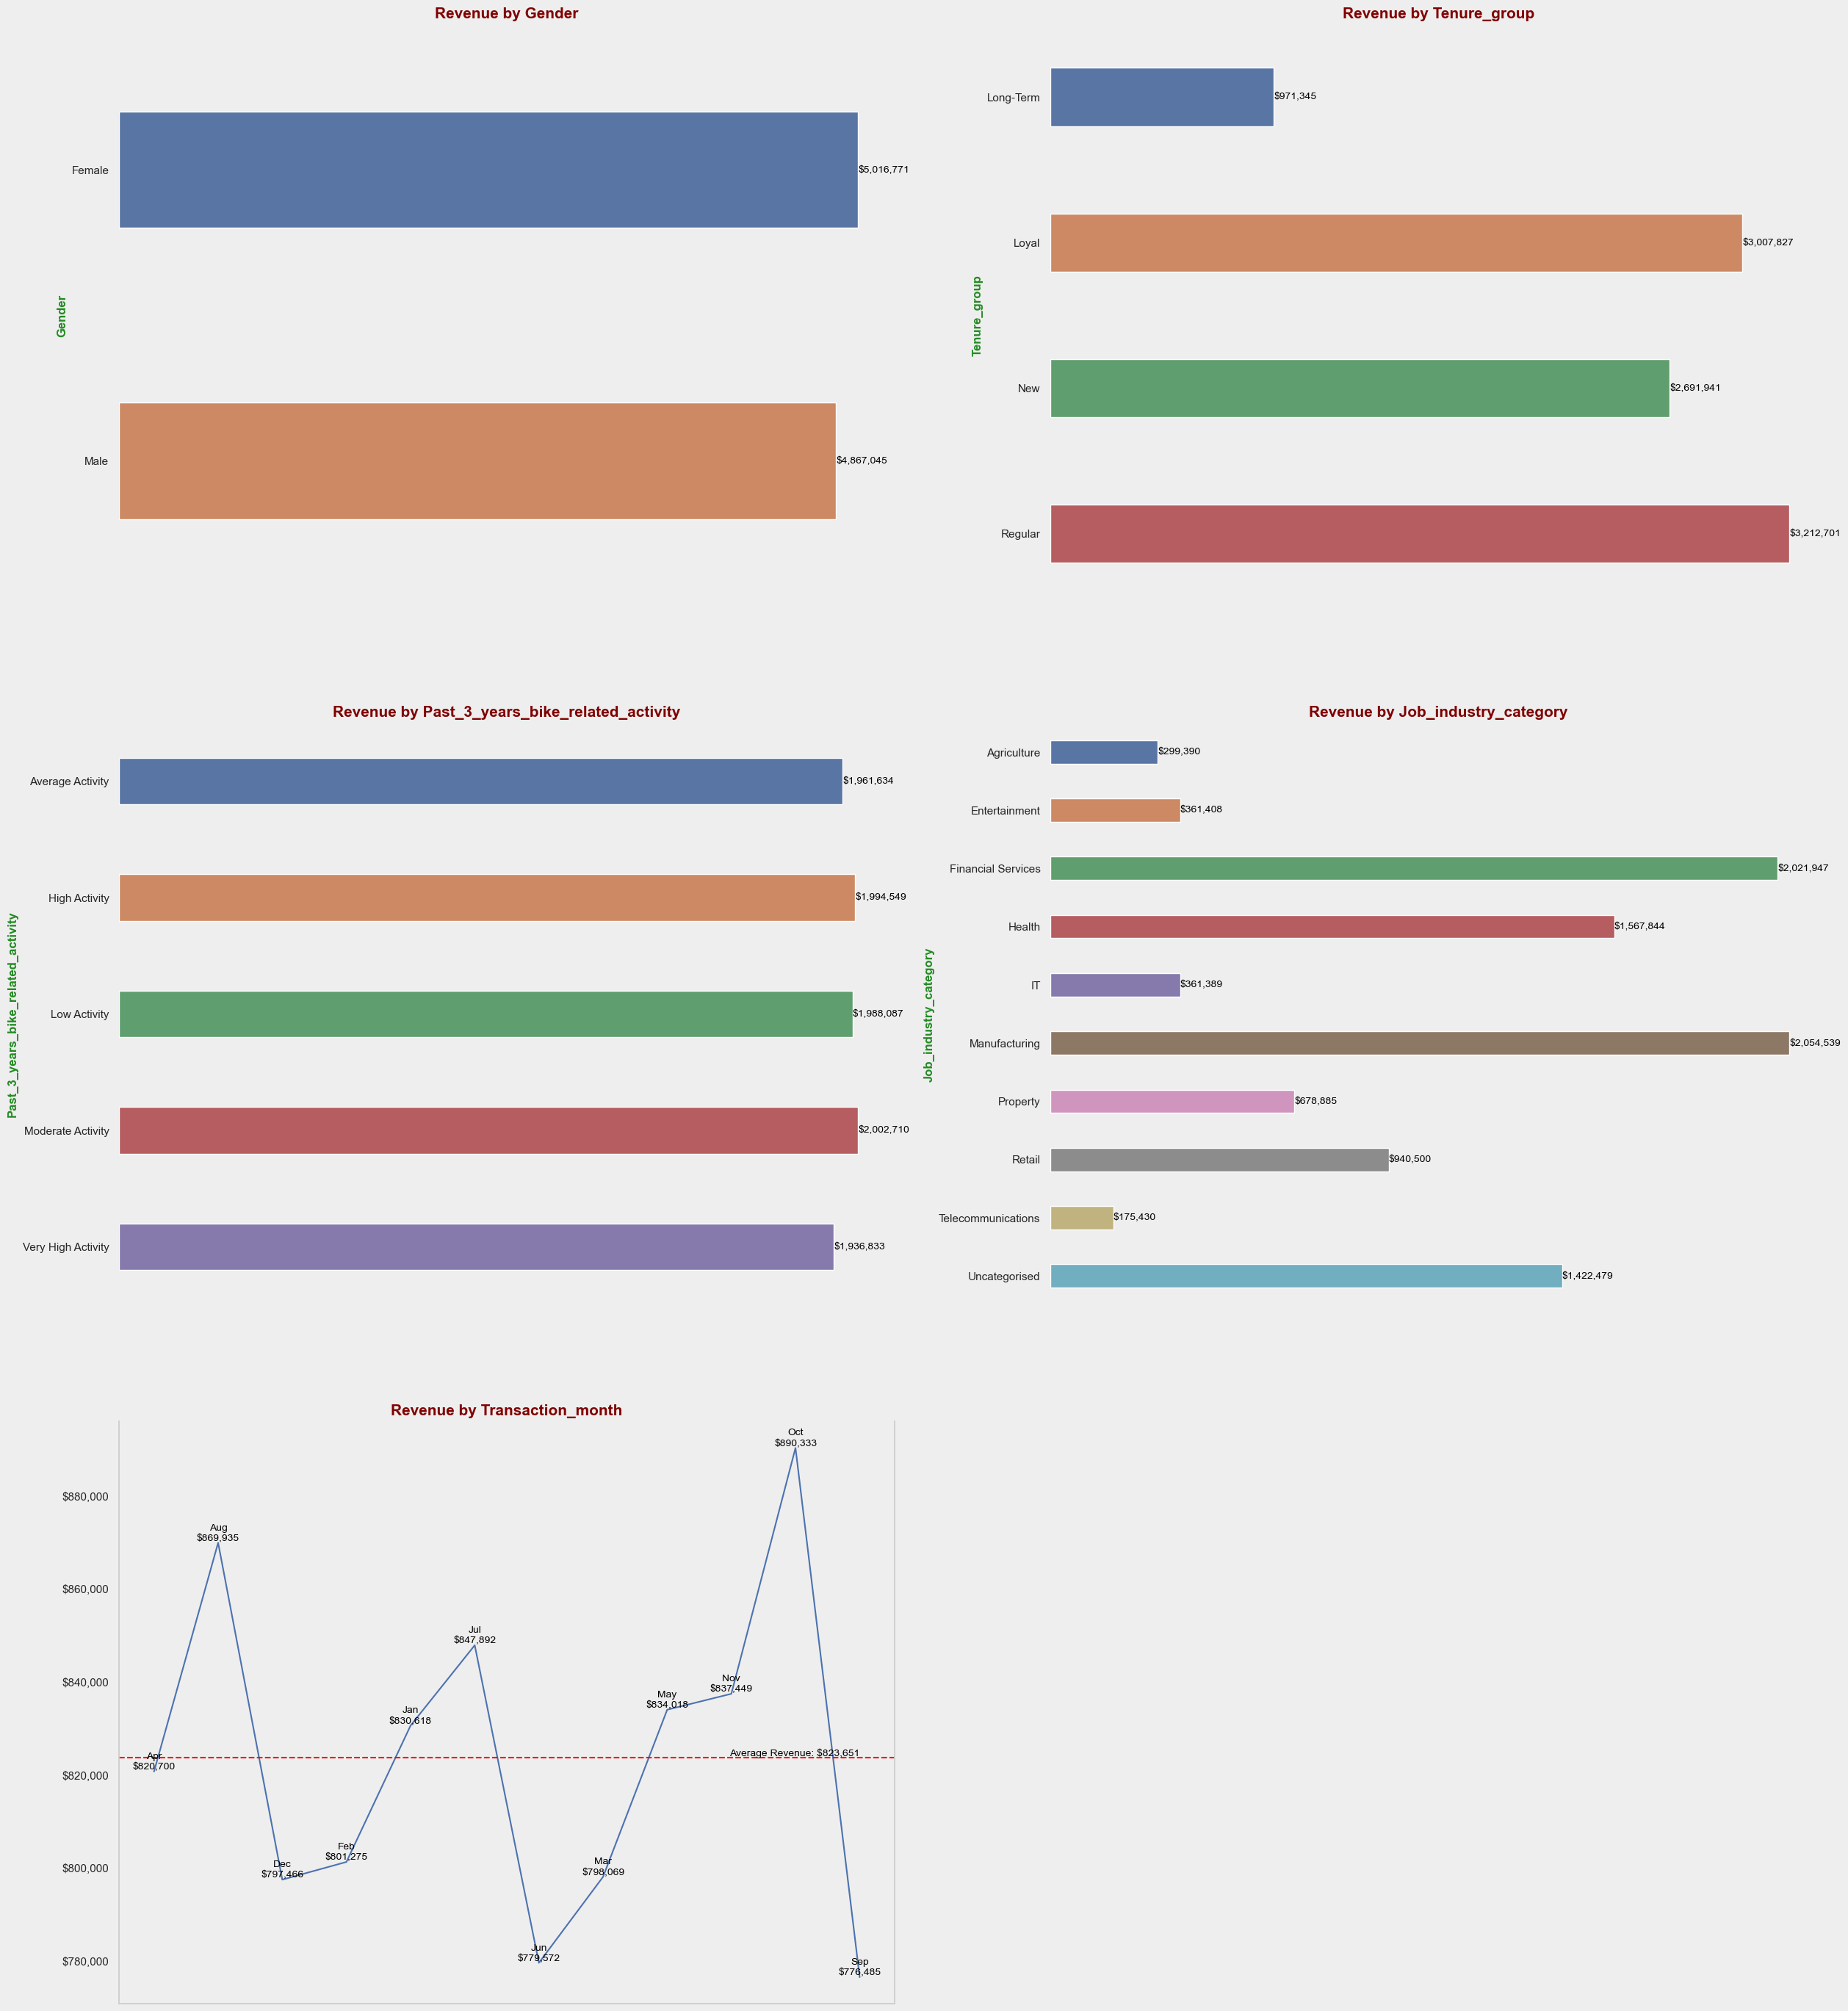

In [72]:
# Select columns to plot
column_to_plot = ['gender', 'tenure_group', 'past_3_years_bike_related_activity', 'job_industry_category', 'transaction_month']

# Define the figure and axes
fig, axes = plt.subplots(3, 2, figsize=(30, 35)) 
fig.set_facecolor('#eeeeee') # background color

# Loop through each category
for i, category in enumerate(column_to_plot):
    ax = axes[i // 2, i % 2]
    
    # Group the data by the category and calculate sum of revenue
    grouped_data = df.groupby(category)['revenue'].sum().reset_index()
    
    # Convert x-axis values to strings
    grouped_data[category] = grouped_data[category].astype(str)
    
    ax.set_facecolor('#eeeeee') # Set chart background
    ax.grid(False) # Remove gridlines
    ax.set_title(f'Revenue by {category.capitalize()}', color='maroon', fontsize=15, fontweight='bold')
    
    # Plot the barplot
    if category in ['gender', 'tenure_group', 'past_3_years_bike_related_activity', 'job_industry_category']:
        # Plot horizontal bar plot
        sns.barplot(y=category, x='revenue', data=grouped_data, ax=ax, width=0.4)
        sns.despine(ax=ax, left=True, bottom=True)
        
        # Annotate bar chart with values
        for index, value in enumerate(grouped_data['revenue']):
            ax.text(value, index, f'${int(value):,}', ha='left', va='center', fontsize=10, color='black')
        
        # Set x-axis and y-axis labels
        ax.set_xlabel(None)
        ax.set_xticks([])
        ax.set_ylabel(category.capitalize(), color='forestgreen', fontweight='bold')
        
    elif category == 'transaction_month':
        # Plot line plot
        sns.lineplot(x=category, y='revenue', data=grouped_data, ax=ax)
        sns.despine(ax=ax, right=False, bottom=False)
        
        # Add average line to the line plot
        average_revenue = grouped_data['revenue'].mean()
        ax.axhline(average_revenue, color='red', linestyle='--')
        # Annotate average line
        max_x_value = grouped_data[category].max()
        ax.text(max_x_value, average_revenue, f'Average Revenue: ${int(average_revenue):,}', ha='right', va='bottom', fontsize=10, color='black')
        
        # Annotate line chart with text
        for index, (month, revenue) in enumerate(zip(grouped_data[category], grouped_data['revenue'])):
            ax.text(month, revenue, f'{month}\n${int(revenue):,}', ha='center', va='bottom', fontsize=10, color='black')
        
        # Set x-axis and y-axis labels
        ax.set_xlabel(None)
        ax.set_xticks([])
        ax.set_ylabel(None)
        
        # Add currency format for y-axis (Revenue)
        ax.yaxis.set_major_formatter('${:,.0f}'.format)

# Remove empty subplots
for i in range(len(column_to_plot), 6):
    row = i // 2
    col = i % 2
    fig.delaxes(axes[row, col])

# Save the figure
plt.savefig('revenue_plots2.png', bbox_inches='tight', pad_inches=0)

plt.show()